<a href="https://colab.research.google.com/github/hannemanbr/MVP-Analise-Dados-Boas-Praticas/blob/main/Sprint_2_MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MVP Análise de Dados e Boas Práticas**

**Nome:** Thomas Alves de Souza Abrantes  
**Matrícula:** 4052025000680 (RA)

**Dataset:**  
*   Netflix Movies and TV Shows:
  *  Arquivo csv extraído no Kaggle ( https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows )
  *  Realizado o upload para o link ( https://raw.githubusercontent.com/hannemanbr/MVP-Analise-Dados-Boas-Praticas/refs/heads/main/netflix_titles.csv )

*   Amazon Prime Movies and TV Shows
  *  Arquivo csv extraído no Kaggle ( https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows/data )
  *  Realizado o upload para o link ( https://raw.githubusercontent.com/hannemanbr/MVP-Analise-Dados-Boas-Praticas/refs/heads/main/amazon_prime_titles.csv )


**Arquivo adicional**  
*  Arquivo contendo a lista de todos os paises em inglês para garantir que os paises informados na coluna 'country' estejam corretos.  
*  Lista de Países ( https://raw.githubusercontent.com/hannemanbr/MVP-Analise-Dados-Boas-Praticas/refs/heads/main/paises.csv )

#**Configuração do Notebook**
---

##Importação das Bibliotecas


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import io
import missingno as ms # para tratamento de missings
import itertools

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from kagglehub import KaggleDatasetAdapter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin # Para criar o transformador customizado
from sklearn.ensemble import RandomForestClassifier

##Variaveis Globais

In [62]:
# Caminho dos arquivos carregados neste Notebook
# Definição das variavéis com o caminho de cada arquivo CSV
# Todos os arquivos estão localizados em meu repositório no Github

url_github_amazon_primes = "https://raw.githubusercontent.com/hannemanbr/MVP-Analise-Dados-Boas-Praticas/refs/heads/main/amazon_prime_titles.csv"
url_github_netflix = "https://raw.githubusercontent.com/hannemanbr/MVP-Analise-Dados-Boas-Praticas/refs/heads/main/netflix_titles.csv"
url_paises = "https://raw.githubusercontent.com/hannemanbr/MVP-Analise-Dados-Boas-Praticas/refs/heads/main/paises.csv"

# Variaveis
separadorString = "-" * 150 # utilizado como um separador
colunaNaoDefinida = "Unnamed" # Nome de colunas sem identificação encontrada na avaliação dos arquivos
total_registros_df_Amazon = 0
total_registros_df_Netflix = 0
valorNaN = 'NaN'

# Variáveis de nome
nomeDataframeAmazon = "df_Amazon"
nomeDataframeNetflix = "df_Netflix"

# Variáveis de descrição
descricaoDataframeAmazon = "Dataframe Amazon"
descricaoDataframeNetflix = "Dataframe Netflix"
descricaoAmazon = "Amazon"
descricaoNetflix = "Netflix"
descricaoDataframeConsolidado = "Dataframe df_filmes_series"
descricaoGrupoGeneros = 'Grupo de Gêneros'
nomeDataframeConsolidado = "df_filmes_series"

# Mensagens
msgNenhumRegistroEncontrado = "Nenhum registro encontrado"
msgRegistros = "registro(s)"
msgPossuiValoresInvalidos = "Possui valores inválidos"
msgOk = "OK"
msgErro = "ERRO"
msgSemColunasExclusivas = 'Não há colunas exclusivas neste dataframe'

# Nome de colunas dos dataframes
colunaOrigem = "origem_dataframe"
colunaTotalNaoNulos = "total_nao_nulos"
colunaResultados = 'resultado'
colunaDiferenca = "diferença"
colunaAtributo = "coluna"
colunaCountry = "country"
colunaPorcentagem = '% de valores válidos'
colunaShowId = "show_id"
colunaReleaseYear = "release_year"
colunaRating = "rating"
colunaListedIn = "listed_in"
colunaTitle = "title"
colunaType = "type"
colunaDuration = "duration"
colunaDirector = "director"
colunaCast = "cast"
colunaDateAdded = "date_added"
colunaDescription = "description"

# Nome das colunas para o dataframe consolidado
# que precisam ser renomeadas, convertidas todas em minusculas e sem acentuação (se houver)
# para manter o padrão e para um entendimento melhor do dado
colunaTitulo = "titulo"
colunaId = "id"
colunaPais = "paises_origem"
colunaTipo = "tipo"
colunaAnoLancamento = "ano_lancamento"
colunaClassificacaoEtaria = "classificacao_etaria"
colunaDuracao = "duracao"
colunaGenero = "genero"
colunaQtdPaisOrigem = 'quantidade_paises_origem'
colunaQtdGenero = 'quantidade_genero'
colunaQtdTitulo = 'quantidade_titulos'
colunaDecada = 'decada'
colunaAlcanceDistribuicao = 'alcance_distribuicao'
colunaQtdDecada = 'quantidade_decada'
colunaGeneroGrupo = 'genero_grupo'

# Resultados de classificacao
resultadoBaixoAlcance = 'Baixo Alcance'
resultadoMedioAlcance = 'Médio Alcance'
resultadoAltoAlcance = 'Alto Alcance'

##Funções

In [63]:
# Bloco com todas as funções que serão utilizadas neste notebook

def separadorLinha(adicionarMaisUmaLinhaVazia = False):
  if (adicionarMaisUmaLinhaVazia is True):
      print("\n")
  print(separadorString)

# Função de filtro para colunas nao definidas
# Exemplo para uso ehColunaValuda(<string>) - Retorana True ou False
def ehColunaValida(nomeColuna):
    return col.find(colunaNaoDefinida) == -1

# Função que converte em lista as informações na saída do método Info()
# Exemplo para uso info_dataframe = lista_info_dataframe(df_Amazon)
def lista_info_dataframe(df):
    buffer = io.StringIO()
    df.info(buf=buffer)
    output = buffer.getvalue()
    lines = output.strip().split('\n')
    return lines

# Função que criar um dataframe vazio
# Exemplo para uso dataFrameNovo = criarDataFrameVazio([lista com nome das colunas separado por virgula])
def criarDataFrameVazio(colunas):
    df = pd.DataFrame(columns=colunas)
    return df

#Verifica se coluna existe no dataframe
def criaListaColunasInexistentes(df, dfComparacao):
    lista_colunas_inexistentes = []
    for col in sorted(dfComparacao):
      if (ehColunaValida(col) == False):
        if not col in df.columns:
            lista_colunas_inexistentes.append(col)
    return lista_colunas_inexistentes

#Verifica se valor informado existe na coluna de um dataframe 'df'
def ehUmPaisValido(valor):
  resultado = ''
  if valor.strip() == '':
    resultado = msgOk
  else:
    for pais in str(valor).split(','):
      if str(pais).lower().strip() == valorNaN.lower():
        possuiPaisInvalido += f'{valorNaN} não existe'
      elif pais.strip().lower() not in df_paises['Country'].str.lower().values:
        resultado += f"{pais} não existe "

  if resultado == '':
    resultado = msgOk

  return resultado

# Remove espaços em branco no início e no fim de cada
  # valor em string em uma lista.
def removeEspacoLista(lista):
  return [item.strip() for item in lista]

# Converte um ano para sua decada em 4 digitos
# (ex: 1997 na decada de 90)
def converteAnoParaDecada(ano):
    decada = (ano // 10) * 10
    return int(str(decada))

# Classificacao do alcance
def classificar_alcance(paises):
    if paises < 50:
        return resultadoBaixoAlcance
    elif 50 <= paises <= 100:
        return resultadoMedioAlcance
    else:
        return resultadoAltoAlcance


# Função para aplicar Multi-Hot Encoding em um DataFrame com os países
def multi_hot_encode_paises(df_paises_series, ohe_model, all_country_features):

    # Inicializa um DataFrame de zeros com as colunas para todos os países
    encoded_df = pd.DataFrame(0, index=df_paises_series.index, columns=all_country_features)

    for idx, paises_str in df_paises_series.items():
        if isinstance(paises_str, str):
            paises_lista = [c.strip() for c in paises_str.split(',')]
            for pais in paises_lista:
                if f'paises_origem_{pais}' in encoded_df.columns: # Verifica se a coluna existe
                    encoded_df.loc[idx, f'paises_origem_{pais}'] = 1
    return encoded_df

##Classes

In [64]:
class MultiHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, sep=','):
        self.sep = sep
        self.unique_categories = None
        self.ohe = None

    def fit(self, X, y=None):
        # Ensure X is a pandas Series if it's a single column DataFrame
        if isinstance(X, pd.DataFrame) and X.shape[1] == 1:
            X = X.iloc[:, 0]

        # Flatten a lista de strings de países em uma única lista de países
        # Garante que lidamos com valores não-string, convertendo para string e depois dividindo
        all_countries = pd.Series(X).astype(str).apply(lambda x: [c.strip() for c in x.split(self.sep)])
        all_countries_flat = [item for sublist in all_countries for item in sublist]

        # Obter categorias únicas e criar um OneHotEncoder com elas
        self.unique_categories = sorted(list(set(all_countries_flat)))
        self.ohe = OneHotEncoder(categories=[self.unique_categories], handle_unknown='ignore', sparse_output=False)
        # O fit real do OHE precisa de um array 2D, mesmo que seja apenas uma coluna
        self.ohe.fit(pd.DataFrame(self.unique_categories, columns=['country']))
        return self

    def transform(self, X):
        # Ensure X is a pandas Series if it's a single column DataFrame
        if isinstance(X, pd.DataFrame) and X.shape[1] == 1:
            X = X.iloc[:, 0]

        # Crie um DataFrame de zeros com as colunas para todas as categorias aprendidas
        transformed_data = pd.DataFrame(0, index=X.index, columns=[f'paises_origem_{c}' for c in self.unique_categories])

        for idx, countries_str in X.items():
            if isinstance(countries_str, str): # Verifique se é uma string antes de dividir
                countries_list = [c.strip() for c in countries_str.split(self.sep)]
                for country in countries_list:
                    col_name = f'paises_origem_{country}'
                    if col_name in transformed_data.columns: # Assegura que a coluna existe
                        transformed_data.loc[idx, col_name] = 1
        return transformed_data.values # Retorna como array numpy para o ColumnTransformer

    def get_feature_names_out(self, input_features=None):
        # Retorna os nomes das features criadas para integração com ColumnTransformer
        return [f'paises_origem_{c}' for c in self.unique_categories]

#**Descrição do Problema**
---

##**Gigantes do Streaming: Análise Exploratória do catálogo da Netflix e Amazon Prime Video**  

A cada dia aumenta a lista das gigantes do streaming como Disney+, Apple TV+ e Paramount+ mas a Netflix e a Amazon Prime continuam sendo as referências neste mercado.

Desta forma, é uma prática comum para seus concorrentes avaliar e analisar profundamente como essas empresas atuam, com a finalidade de otimizar seu próprio planejamento e ações estratégicas. Entender como esses gigantes operam é o passo inicial para qualquer concorrente que almeja conquistar uma fatia de mercado.  

Vamos analisar o catálogo da Netflix e Amazon Prime.
<br>
## **Hipóteses do Problema**
*  Quais países produzem os gêneros mais populares no catálogo?
*  Quais período (agrupado por décadas) houve mais produção de títulos?
*  Quais gêneros são mais populares no catálogo?


#**Tipo de Problema**

Neste MVP vamos realizar:
*  A análise exploratória de dados para verificar o quais conteúdeos de cada empresa tem mais alcance.
*  Vamos analisar e extrair insights baseados nos dados disponíveis no Kaggle  sobre a quantidade de títulos, gêneros e o ano de lançamento de cada plataforma.
*  Com a análise teremos a possibilidade de avaliar os resultados entre as duas empresas.

#**Seleção dos dados**
---

**Dataset Netflix-movies-and-tv-shows**

De acordo com a documentação no Kaggle, o dataset Netflix possui mais de 8 mil registros com informações sobre filmes e as séries disponíveis na plataforma Netflix até 2021.   
Este dataset foi projetado para análise de dados, descoberta de tendências, construção de modelos de recomendação e exploração de conteúdo.

Seus dados inclui detalhes como título, tipo (filme ou série), diretor, elenco, país de produção, data de lançamento, classificação indicativa, duração (em minutos para filmes e temporadas para séries), gêneros e uma breve descrição.  

O conjunto de dados foi coletado do Flixable, um mecanismo de busca de conteúdo Netflix.

**Fonte da informação:** https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows

**Dataset amazon-prime-movies-and-tv-shows**

De acordo com a documentação no Kaggle, o dataset Amazon Prime tem mais de 9 mil registros de filmes e séries disponíveis em sua plataforma até meados de 2021.

Seus dados inclui informações como títulos dos filmes e séries, elenco, diretores, classificações, ano de lançamento, e duração.

**Fonte da informação:** https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows/data

Para minha análise vou utilizar as colunas listadas abaixo, para que possa responder as perguntas.

*   **type:** (string) Tipo de conteúdo, "Movie" ou "TV Show".
*   **country:** (string) País(es) de produção do filme ou série.
*   **release_year:** (inteiro) Ano de lançamento do filme ou série.
*   **listed_in:** (string) Gêneros do conteúdo, separados por vírgula.

## Atributos de cada dataset que será carregado (Dicionário de dados)
---

**Dataset Netflix**

*   **show_id:** (string) ID único para cada filme ou série.
*   **type:** (string) Tipo de conteúdo, "Movie" ou "TV Show".
*   **title:** (string) Título do filme ou série.
*   **director:** (string) Diretor(es) do filme ou série (pode haver múltiplos, separados por vírgula).
*   **cast:** (string) Elenco do filme ou série (pode haver múltiplos, separados por vírgula).
*   **country:** (string) País(es) de produção do filme ou série.
*   **date_added:** Data em que o conteúdo foi adicionado à Netflix.
*   **release_year:** (string) Ano de lançamento do filme ou série.
*   **rating:** (string) Classificação indicativa do conteúdo (por exemplo, "TV-MA", "PG-13").
*   **duration:** (string) Duração do conteúdo. Para filmes, é em minutos; para séries, é o número de temporadas.  
  **Observação:** O tempo no formato string poder no padrão valor numérico serguido do termo "min." quando é um filme.
  Para títulos destinados a TV como séries essa informação é registrada como um valor numérico com o tesmo seasons (Temporada), inidicado quantidade de temporadas.
*   **listed_in:** (string) Gêneros do conteúdo, separados por vírgula.
*   **description:** (string) Breve descrição do conteúdo.

<br>  

**Dataset Amazon Prime**


*  **show_id:** (string) ID único do títul.
*  **type:** (string) Tipo de conteúdo (filme ou série).
*  **title:** (string) Título do filme ou série.
*  **director:** Nome do(s) diretor(es) (pode ser uma lista de nomes separados por vírgula).
*  **cast:** (string) Elenco principal (pode ser uma lista de nomes separados por vírgula).
*  **country:** (string) País de origem (pode ser uma lista de países separados por vírgula).
*  **date_added:** (string) Data em que o título foi adicionado ao Amazon Prime.
*  **release_year:** (inteiro) Ano de lançamento do título.
*  **rating:** (string) Classificação etária.
*  **duration:** (string) Duração do título (exemplo, "90 min" ou "1h 30m").  
  **Observação:** (string) O tempo no formato string desrito no padrão valor numérico serguido do termo "min." quando é um filme.
  Para títulos destinados a TV como séries essa informação é registrada como um valor numérico com o tesmo seasons (Temporada), inidicado quantidade de temporadas.
*  **listed_in:** (string) Gênero ou categorias do título (pode ser uma lista de gêneros separados por vírgula).
*  **description:** (string) Breve descrição do título.


## Atributos para análise após consolidação dos datasets
---

**Dataset Consolidado:** Após unificar os dados do dataset Netflix e Amazon Prime, será analisado os valores das colunas:

*  **type:** (string) Tipo de conteúdo, "Movie" ou "TV Show".
*  **country:** (string) País(es) de produção do filme ou série.
*  **release_year:** (inteiro) Ano de lançamento do filme ou série.
*  **listed_in:** (string) Gêneros do conteúdo, separados por vírgula.

Antes do pré-processamento, vou renomear as colunas para um nome mais amigável conforme lista abaixo:

*  **tipo:** (string) Tipo de conteúdo, "Movie" ou "TV Show".
*  **pais_de_origem:** (string) País(es) de produção do filme ou série.
*  **ano_lancamento:** (inteiro) Ano de lançamento do filme ou série.
*  **genero:** (string) Gêneros do conteúdo, separados por vírgula.

<br>

**Colunas que serão criadas**  
<hr>

Criação da coluna Origem indicando se o registro é do dataset Netflix ou Amazon Prime.

*  **origem_dataframe:** (string) Indicado se a fonte utilizada é Amazon ou Netflix.

Criação da coluna Quantidade de Países Origem, que vai contabilizar quantidade de países que participaram da produção da obra.
*  **quantidade_paises_origem** (int) Quantidade de países em cada título.

Criação da coluna Grupo de Gênero que vai categorizar um grupo de gêneros, pois veremos na análise que há uma grande quantidade de gêneros com mesmo contexto mas descrição diferente.
*  **genero_grupo** (string) Nome de um grupo de gêneros.

# **Carga dos Dados**
---

Cada arquivo será carregado para um dataframe e posteriormente consolidado

In [65]:
# Lendo os arquivos para um DataFrame
df_Amazon = pd.read_csv(url_github_amazon_primes, delimiter=',')

# o arquivo Netflix apresentou problema na carga devido ao seu enconding lantin-1
# Por este motivo foi necessário a configuração do Enconding na leitura pelo Pandas
df_Netflix = pd.read_csv(url_github_netflix, delimiter=',', encoding='latin-1')

Um arquivo contendo a lista dos paises será carregado para analisar se os países carregados estão corretos

In [66]:
# Lista de paises
# Criando dataset (sem coluna e linhas separadas por virgula) com a coluna "Country"
# A coluna sera nomeada como "Country", apenas para que tenha o mesmo nome das colunas "country" que informam os paises dos títulos.
df_paises = pd.read_csv(url_paises, sep=',', header=None, names=['Country'])

#**Análise dos dados carregados (dados brutos)**
---

Análise dos dados carregados antes dos tratamentos

##Consultando os dados importados

Listando apenas com as colunas que serão analisadas.

In [67]:
print(f"Consultando cada dataframe criado")
separadorLinha()
print(f"{descricaoDataframeAmazon}")
separadorLinha()
print(df_Amazon[df_Amazon[colunaCountry].str.contains(',', na=False)].loc[:, [colunaType, colunaCountry, colunaListedIn, colunaReleaseYear]].head(5).to_string(index=False))
print(f"{descricaoDataframeNetflix}")
separadorLinha()
print(df_Netflix[df_Netflix[colunaCountry].str.contains(',', na=False)].loc[:, [colunaType, colunaCountry, colunaListedIn, colunaReleaseYear]].head(5).to_string(index=False))

Consultando cada dataframe criado
------------------------------------------------------------------------------------------------------------------------------------------------------
Dataframe Amazon
------------------------------------------------------------------------------------------------------------------------------------------------------
   type                                country                listed_in  release_year
  Movie                 United Kingdom, France Drama, Romance, Suspense          2018
  Movie                   United States, Italy          Drama, Suspense          2017
  Movie                   United States, India  International, Suspense          2019
TV Show          United Kingdom, United States                   Comedy          2020
  Movie United States, United Kingdom, Germany           Action, Comedy          2008
Dataframe Netflix
-----------------------------------------------------------------------------------------------------------------

## Total de registros importados
Consultando total de registros de cada dataframe.  
Esta informação será utilizada para contabilizar valores nulos e inválidos.

In [68]:
# Total de registros em cada Dataframe
total_registros_df_Amazon = len(df_Amazon)
total_registros_df_Netflix = len(df_Netflix)

print(f"Total de Registros em cada Dataframe")
separadorLinha(True)
print(f"{descricaoDataframeAmazon}: {total_registros_df_Amazon} registros\n")
print(f"{descricaoDataframeNetflix}: {total_registros_df_Netflix} registros\n")

Total de Registros em cada Dataframe


------------------------------------------------------------------------------------------------------------------------------------------------------
Dataframe Amazon: 9668 registros

Dataframe Netflix: 8809 registros



##Listando as colunas de cada arquivo importado

In [69]:
# Consutando a quantidade de registros, quantidade e nome das colunas dos DataFrames amazon_prime_titles.csv e netflix_titles.csv
separadorLinha()
print(f"DataFrame Amazon")
separadorLinha()
print(f"- {len(df_Amazon.columns)} colunas \n- {len(df_Amazon)} registros \n- Descrição:")

# Listando o nome das colunas em lista para facilitar leitura
for col in sorted(df_Amazon):
    print(f"\t- {col}")

separadorLinha(True)
print(f"DataFrame Netfilx")
separadorLinha()
print(f"- {len(df_Netflix.columns)} colunas \n- {len(df_Netflix)} registros \n- Descricao:")

# Listando o nome das colunas em lista para facilitar leitura
for col in sorted(df_Netflix):
        print(f"\t- {col}")

separadorLinha()

------------------------------------------------------------------------------------------------------------------------------------------------------
DataFrame Amazon
------------------------------------------------------------------------------------------------------------------------------------------------------
- 12 colunas 
- 9668 registros 
- Descrição:
	- cast
	- country
	- date_added
	- description
	- director
	- duration
	- listed_in
	- rating
	- release_year
	- show_id
	- title
	- type


------------------------------------------------------------------------------------------------------------------------------------------------------
DataFrame Netfilx
------------------------------------------------------------------------------------------------------------------------------------------------------
- 26 colunas 
- 8809 registros 
- Descricao:
	- Unnamed: 12
	- Unnamed: 13
	- Unnamed: 14
	- Unnamed: 15
	- Unnamed: 16
	- Unnamed: 17
	- Unnamed: 18
	- Unnamed: 19
	- Unnamed

A maioria das colunas do dataframe df_Amazon são iguais ao df_Netflix.

Porém o dataframe df_Netflix listou colunas com a descrição "Unnamed", indicando ser coluna sem nome e possívelmente vazias.  
Isso ocorre quando há separadores sem informação no arquivo.

## Avaliando se as colunas "Unnamed" no dataframe Netflix

In [70]:
# Total de registros não nulos nas colunas "Unnamed" no dataframe df_Netflix
total_registros_df_Netflix = len(df_Netflix)

print(f"{ descricaoDataframeNetflix}: Colunas com valores inválidos")
separadorLinha()

# Listando as colunas Unnamed e a quantidade de registros não nulos
for col in sorted(df_Netflix):
        if (ehColunaValida(col) == False):
          mensagem = f"\t- Coluna: {col}: "
          if (df_Netflix[col].count() == 0):
            mensagem += msgNenhumRegistroEncontrado
          else:
            mensagem += f"{df_Netflix[col].count()} { msgRegistros }"
          print(mensagem)

separadorLinha()

Dataframe Netflix: Colunas com valores inválidos
------------------------------------------------------------------------------------------------------------------------------------------------------
	- Coluna: Unnamed: 12: Nenhum registro encontrado
	- Coluna: Unnamed: 13: Nenhum registro encontrado
	- Coluna: Unnamed: 14: Nenhum registro encontrado
	- Coluna: Unnamed: 15: Nenhum registro encontrado
	- Coluna: Unnamed: 16: Nenhum registro encontrado
	- Coluna: Unnamed: 17: Nenhum registro encontrado
	- Coluna: Unnamed: 18: Nenhum registro encontrado
	- Coluna: Unnamed: 19: Nenhum registro encontrado
	- Coluna: Unnamed: 20: Nenhum registro encontrado
	- Coluna: Unnamed: 21: Nenhum registro encontrado
	- Coluna: Unnamed: 22: Nenhum registro encontrado
	- Coluna: Unnamed: 23: Nenhum registro encontrado
	- Coluna: Unnamed: 24: Nenhum registro encontrado
	- Coluna: Unnamed: 25: Nenhum registro encontrado
--------------------------------------------------------------------------------------

**Conclusão:** Com o resultado acima, essas colunas serão descartadas na análise.

## Análise de registros nulos por coluna em cada dataframe


Consultando valores nulos em todas as colunas do dataframe Amazon.  

**Melhorando o resultado com percentual de acordo com total de registros**

In [71]:
# Dataframe Amazon
# verificando nulls no dataset
separadorLinha()
print(descricaoAmazon)
separadorLinha()

df_resultado_amazon_nulo = criarDataFrameVazio([colunaAtributo, 'Total de nulos', '%'])
linhas_valores = []

# verificando nulls no dataset
for linha in df_Amazon.columns:
  nova_linha = {
      colunaAtributo: df_Amazon.columns,
      'total de nulos': df_Amazon.isnull().sum(),
      '%': df_Amazon.isnull().sum()*100/len(df_Amazon)
  }
  linhas_valores.append(nova_linha)

# verificando nulls no dataset
print(f'Colunas do dataframe {descricaoAmazon} e % de valores nulos')
separadorLinha()
df_resultado_amazon_nulo = pd.DataFrame(linhas_valores)
print(df_Amazon.isnull().sum()*100/len(df_Amazon))

separadorLinha(True)

# --------------------------------------------------------------------------------------

# Dataframe Netflix
# verificando nulls no dataset
print(descricaoNetflix)
separadorLinha()

# Removendo colunas unnamed no dataframe
unnamed_columns = [col for col in df_Netflix.columns if colunaNaoDefinida in col]
df_Netflix.drop(columns=unnamed_columns, axis=1, inplace=True)

df_resultado_netflix_nulo = criarDataFrameVazio([colunaAtributo, 'Total de nulos', '%'])
linhas_valores = []

# verificando nulls no dataset
for linha in df_Netflix.columns:
  nova_linha = {
      colunaAtributo: df_Netflix.columns,
      'total de nulos': df_Netflix.isnull().sum(),
      '%': df_Netflix.isnull().sum()*100/len(df_Netflix)
  }
  linhas_valores.append(nova_linha)

# verificando nulls no dataset
print(f'Colunas do dataframe {descricaoNetflix} e % de valores nulos')
separadorLinha()
df_resultado_netflix_nulo = pd.DataFrame(linhas_valores)
print(df_Netflix.isnull().sum()*100/len(df_Netflix))

------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon
------------------------------------------------------------------------------------------------------------------------------------------------------
Colunas do dataframe Amazon e % de valores nulos
------------------------------------------------------------------------------------------------------------------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        21.545304
cast            12.753413
country         93.049235
date_added      98.396773
release_year     0.000000
rating           3.485726
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


------------------------------------------------------------------------------------------------------------------------------------------------------
Netflix
---

**No dataframe Amazon**, a coluna "country" apresenta uma grande quantidade de valores nulos, no seu descarte termos uma amostra muito pequena de registros da Amazon Prime.

## Gráficos

Vamos analisar os gráficos, para melhorar a leitura dos dados.  
A seguir os gráficos com informações dos dados de cada dataset.

### Configuração

Preparação para uso das informações nos gráficos

In [72]:
# A função 'criaListaColunasInexistentes' vai comparar um dataframe origem com um dataframe de comparação
# e caso exista coluna somente em um dataframe ele vai criar um registro com nome da coluna
colunaNetflixExclusiva = criaListaColunasInexistentes(df_Netflix, df_Amazon)
colunaAmazonExclusiva = criaListaColunasInexistentes(df_Amazon, df_Netflix)

#Dataframe que armazenar o resultado das colunas com registros nulos e suas informações
df_valida_valores = criarDataFrameVazio([
    colunaOrigem,
    colunaAtributo,
    colunaResultados,
    colunaDiferenca,
    colunaTotalNaoNulos,
    colunaPorcentagem])

#indice da nova linha a ser inserida no dataframe df_valida_valores
indice = 0

#calculando os dados para do dataframe Amazon
for col in sorted(df_Amazon):
  if (df_Amazon[col].count() < total_registros_df_Amazon):
    mensagem = msgErro
  else:
    mensagem = msgOk

  nova_linha = {colunaOrigem: descricaoAmazon,
                colunaAtributo: col,
                colunaTotalNaoNulos: df_Amazon[col].count(),
                colunaDiferenca: total_registros_df_Amazon - df_Amazon[col].count(),
                colunaResultados: mensagem,
                colunaPorcentagem: round((df_Amazon[col].count() * 100) / total_registros_df_Amazon,2)}
  df_valida_valores.loc[indice] = nova_linha
  indice += 1

#calculando os dados para do dataframe Netflix e ignorando colunas inválidas
for col in sorted(df_Netflix):
  if (ehColunaValida(col) == True):
    if (df_Netflix[col].count() < total_registros_df_Netflix):
      mensagem = msgErro
    else:
      mensagem = msgOk
    nova_linha = {colunaOrigem: descricaoNetflix,
                  colunaAtributo: col,
                  colunaTotalNaoNulos: df_Netflix[col].count(),
                  colunaDiferenca: total_registros_df_Netflix - df_Netflix[col].count(),
                  colunaResultados: mensagem,
                  colunaPorcentagem: round((df_Netflix[col].count() * 100) / total_registros_df_Netflix,2)}
    df_valida_valores.loc[indice] = nova_linha
    indice += 1

Configuração para gráfico de barras

In [73]:
#-------------------------------------------------------------------------------
# -- Planilha com colunas que possui valores nulos e quantidades
# -- Lista de colunas e registros
#-------------------------------------------------------------------------------
df_colunas_qtd_valores_nulos = df_valida_valores[(df_valida_valores[colunaResultados] == msgErro)]
df_colunas_qtd_valores_nulos = df_colunas_qtd_valores_nulos.sort_values(by=[colunaAtributo, colunaOrigem], ascending=[True, True])

# Valores no eixo X
df_amazon_qtd_valores_nulos = df_colunas_qtd_valores_nulos[(df_colunas_qtd_valores_nulos[colunaOrigem] == descricaoAmazon)].sort_values(by=colunaAtributo)
df_netflix_qtd_valores_nulos = df_colunas_qtd_valores_nulos[(df_colunas_qtd_valores_nulos[colunaOrigem] == descricaoNetflix)].sort_values(by=colunaAtributo)

colunas_grafico_barras = [
    colunaCast,
    colunaCountry,
    colunaDateAdded,
    colunaDirector,
    colunaRating
    ]

# função para exibir dados completos dos erros em registros para cada coluna
# Nao foi colocado no bloco de variaveis globais pq esta sendo usado somente nesta sessão
# e utilizando varivaeis calculadas neste bloco
def exibirDadosCompletosRegistros():
  separadorLinha(True)
  print('Análise dos registros dos dataframes')
  separadorLinha()
  print(df_colunas_qtd_valores_nulos.to_string(index=False))
  separadorLinha(True)


### Matriz (Visualização matricial da nulidade do dataset)

Vamos utilizar a matriz para avaliar os dados nulos em cada coluna.

**Dataset Amazon Prime**

Dataframe Amazon
------------------------------------------------------------------------------------------------------------------------------------------------------


<Axes: >

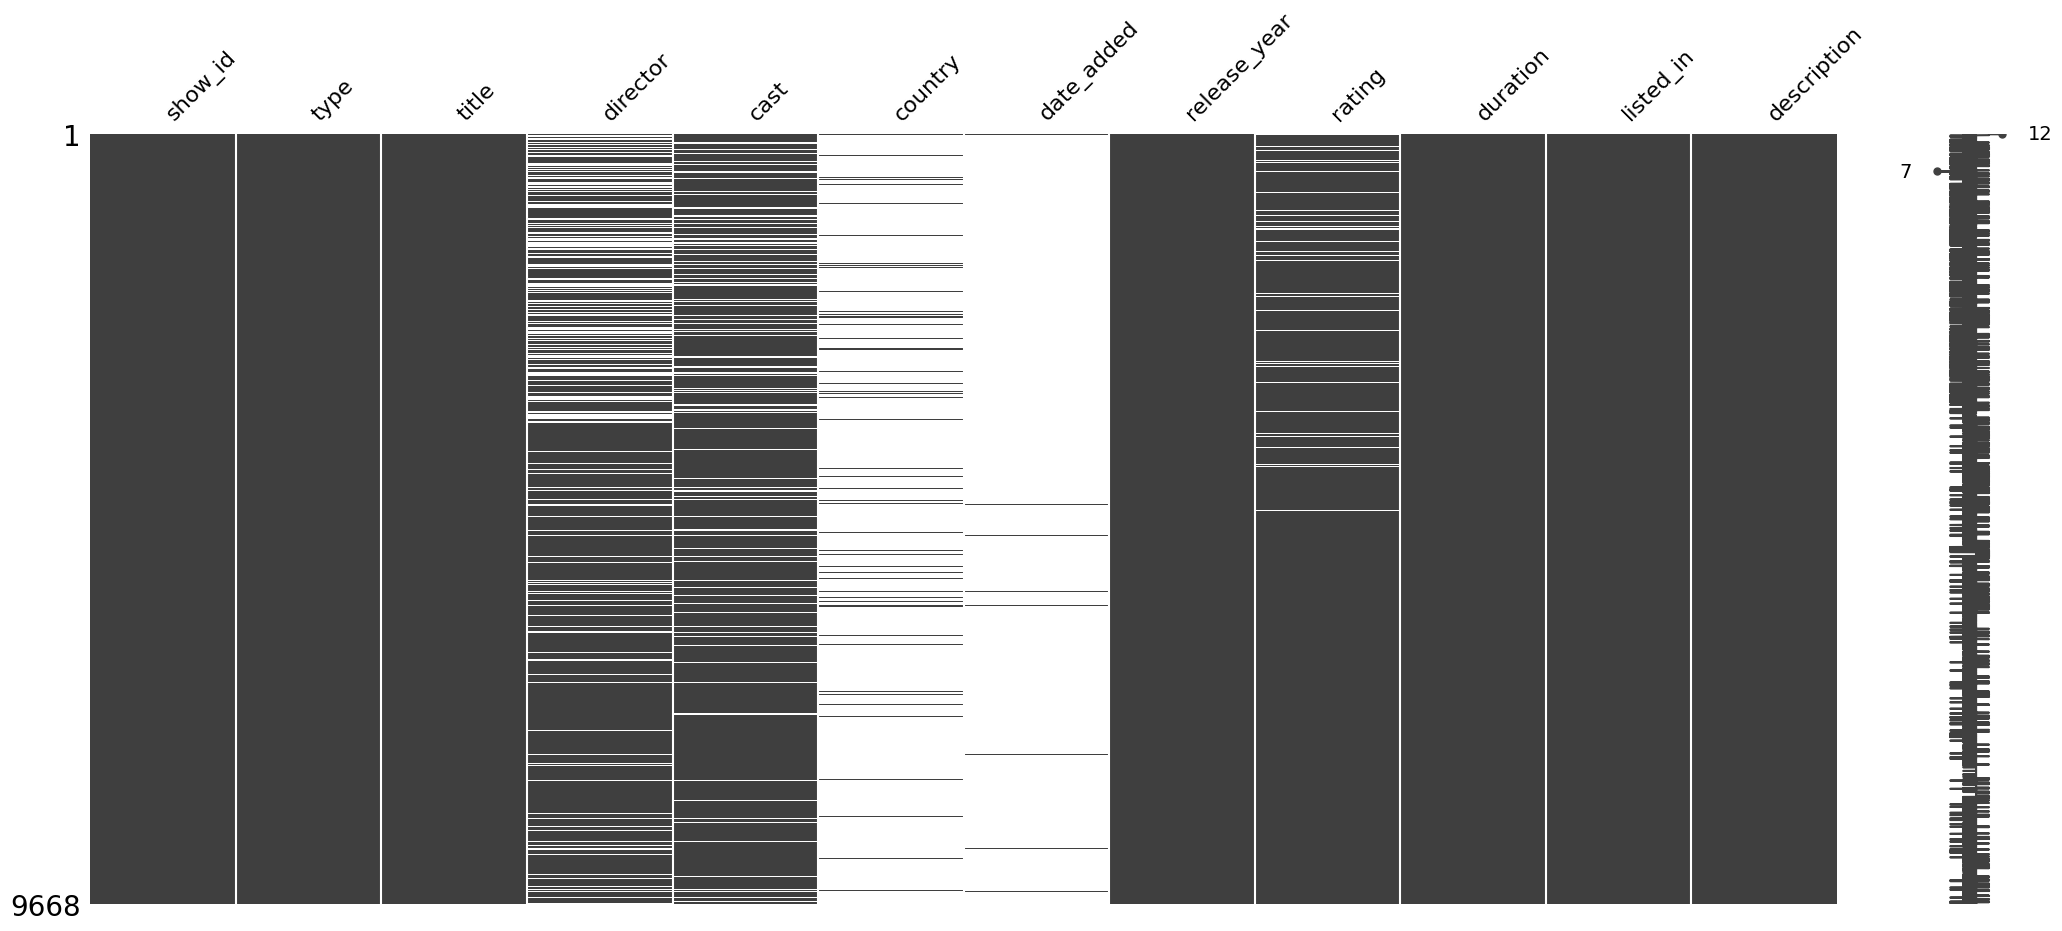

In [74]:
# salvando um novo dataset para tratamento de missings
# recuperando os nomes das colunas
print(descricaoDataframeAmazon)
separadorLinha()

df_AmazonCopia = df_Amazon.copy()

col = list(df_AmazonCopia.columns)

# o novo dataset irá conter todas as colunas do dataset original
df_AmazonSemMissings = df_AmazonCopia[col[:]]

# substituindo os zeros por NaN
df_AmazonSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_AmazonSemMissings)

**Conclusão:** Conforme vimos no relatório de registros nulos, fica visível no dataframe Amazon, a quantidade de registros nulos na coluna "country".
Aproveitando o resultado de todas as colunas, podemos ver a deficiência de dados nas outras colunas como "director" com uma proporção baixa mas a coluna "date_added" com alto grau de registros nulos.

**Dataset Netflix**

Dataframe Netflix
------------------------------------------------------------------------------------------------------------------------------------------------------


<Axes: >

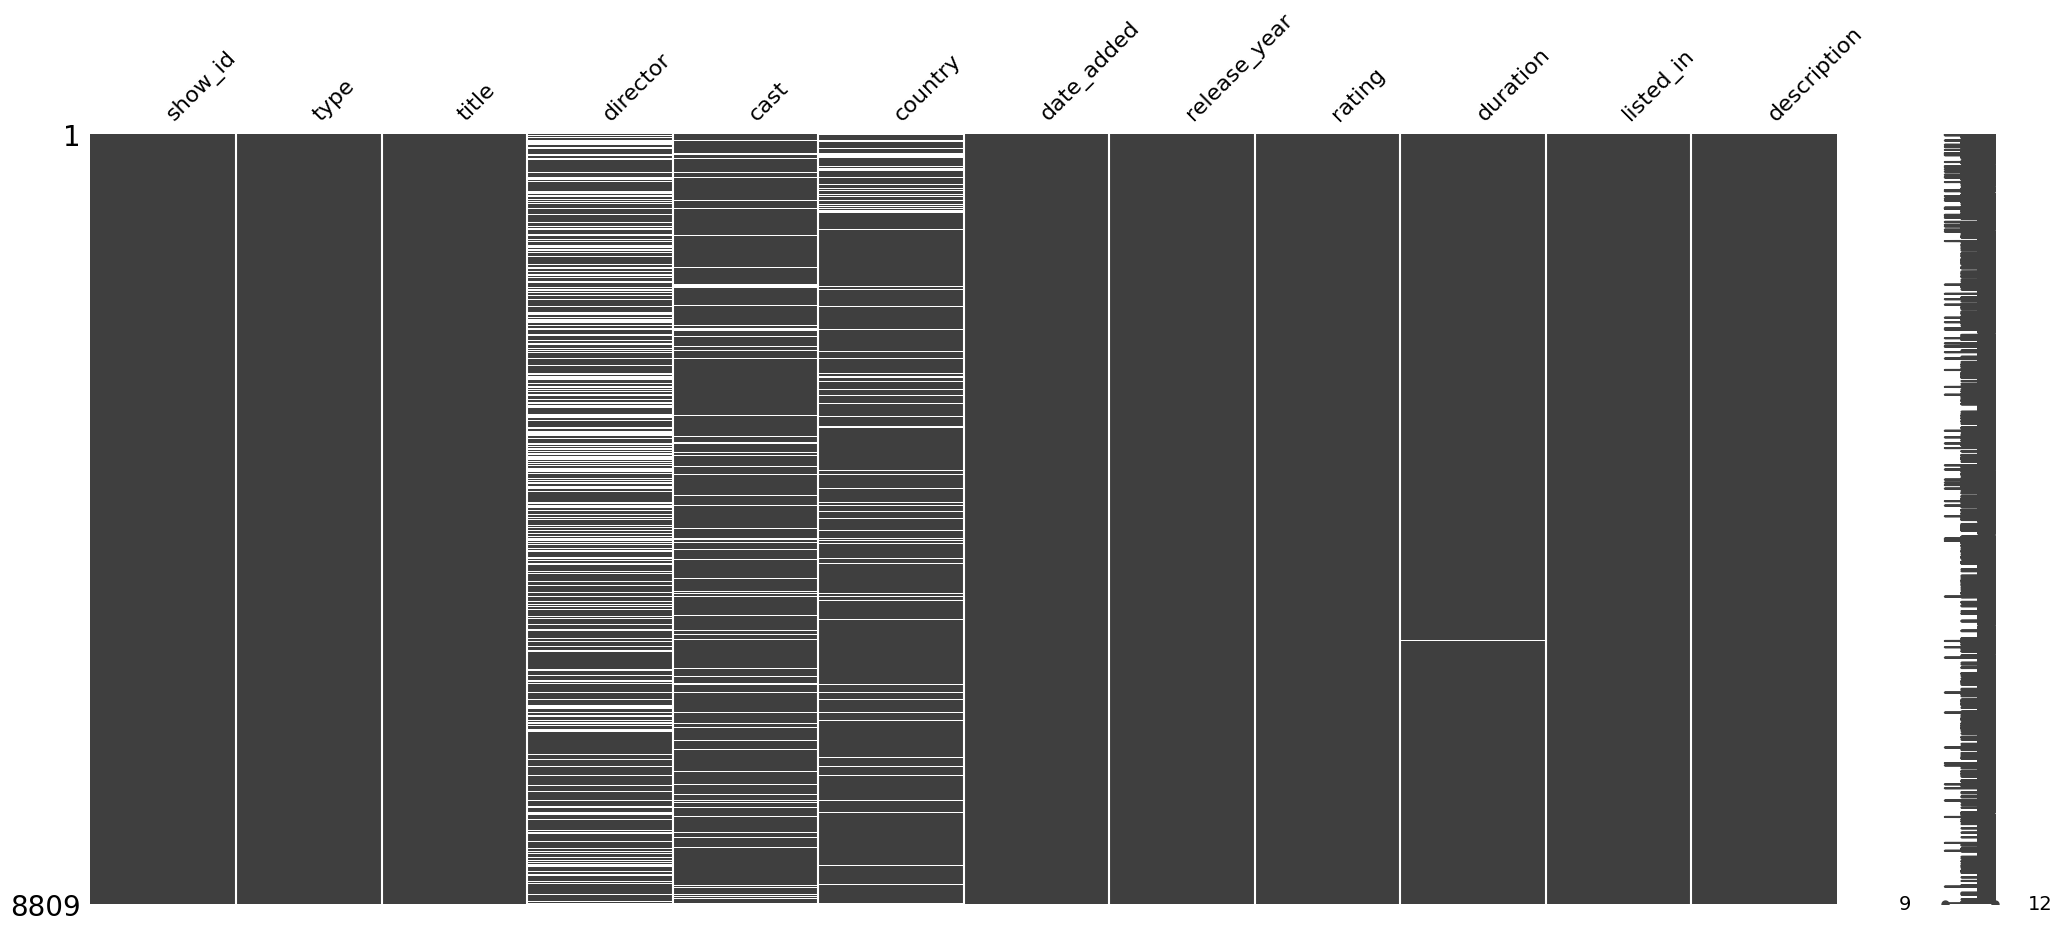

In [75]:
print(descricaoDataframeNetflix)
separadorLinha()

df_NetflixCopia = df_Netflix.copy()

col = list(df_NetflixCopia.columns)

# o novo dataset irá conter todas as colunas do dataset original
df_NetflixSemMissings = df_NetflixCopia[col[:]]

# substituindo os zeros por NaN
df_NetflixSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_NetflixSemMissings)

**Conclusão:** No dataframe Netflix a coluna "country" apresenta um número menor de valores nulos.
Com exceção na coluna "director" podemos ver que nas demais colunas temos num nível baixo de valores nulos, que permite uma amostra bem melhor que o dataset Amazon Prime proporciona.

### Gráfico de barras

Gráfico de barras com quantidade absoluta de registros nulos



------------------------------------------------------------------------------------------------------------------------------------------------------
Análise dos registros dos dataframes
------------------------------------------------------------------------------------------------------------------------------------------------------
origem_dataframe     coluna resultado  diferença  total_nao_nulos  % de valores válidos
          Amazon       cast      ERRO       1233             8435                 87.25
         Netflix       cast      ERRO        825             7984                 90.63
          Amazon    country      ERRO       8996              672                  6.95
         Netflix    country      ERRO        831             7978                 90.57
          Amazon date_added      ERRO       9513              155                  1.60
         Netflix date_added      ERRO         10             8799                 99.89
          Amazon   director      ERRO      

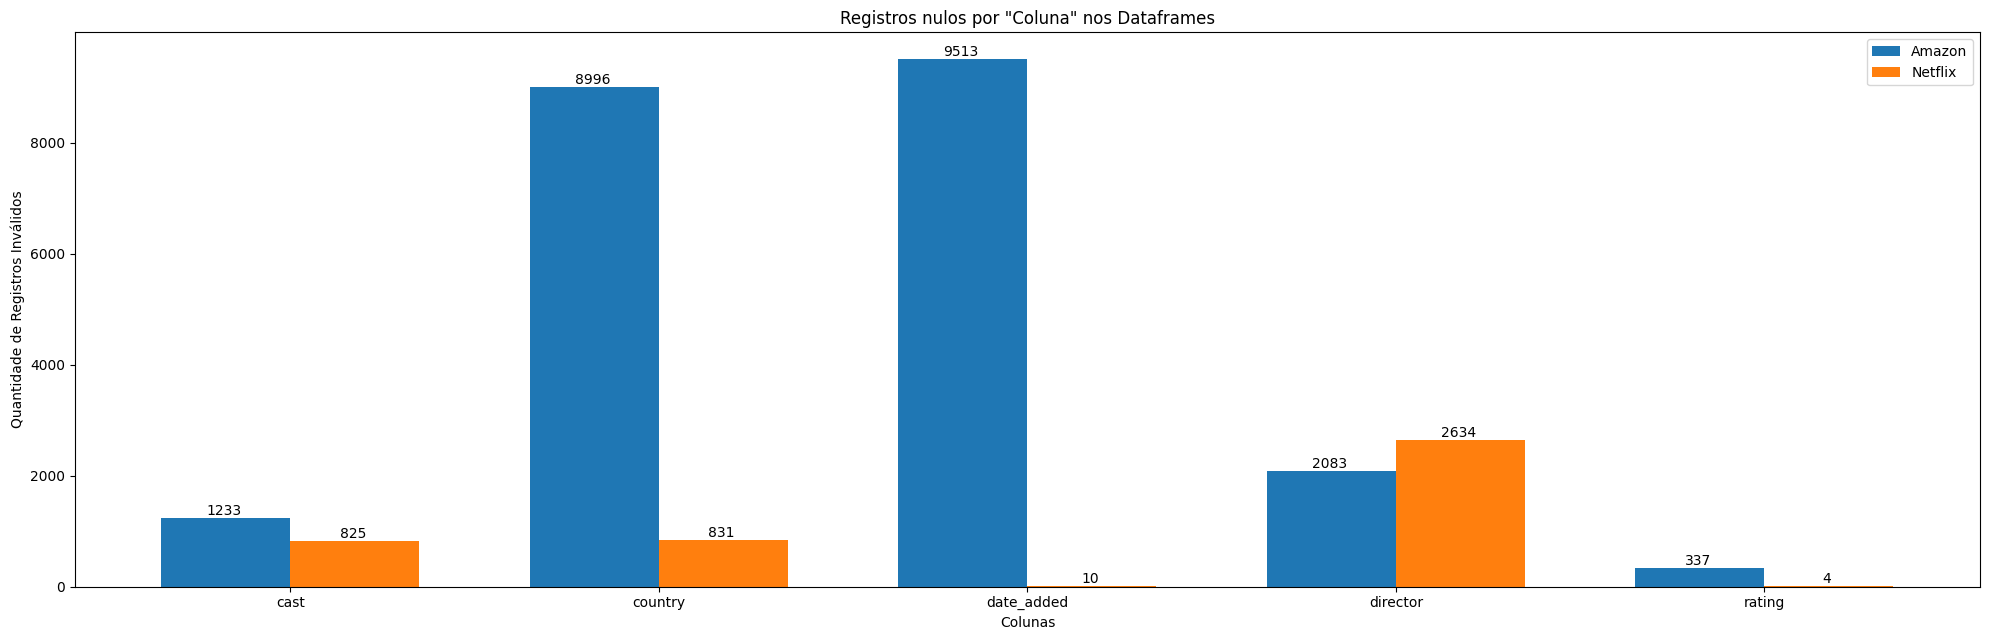

In [76]:
#-------------------------------------------------------------------------------
# Configuração do gráfico com quantidade de registros
#-------------------------------------------------------------------------------

# Para facilitar a análise do resultado coloquei para exibir
# novamente a informação com total de registros de cada coluna e dataframe
exibirDadosCompletosRegistros()

valoresAmazonFiltrado = df_amazon_qtd_valores_nulos[~df_amazon_qtd_valores_nulos[colunaAtributo].isin([colunaDuration])]
valoresNetflixFiltrado = df_netflix_qtd_valores_nulos[~df_netflix_qtd_valores_nulos[colunaAtributo].isin([colunaDuration])]

valoresAmazon = valoresAmazonFiltrado[colunaDiferenca]
valoresNetflix = valoresNetflixFiltrado[colunaDiferenca]

# Definir a largura das barras
largura_barra = 0.35

# Criação da figura e do eixo
fig, ax = plt.subplots(figsize=(20, 6.5))

# Plotar as barras usando as colunas específicas para os valores e categorias
rects1 = ax.bar(np.arange(len(valoresAmazon)), valoresAmazon, largura_barra, label='Amazon')
rects2 = ax.bar(np.arange(len(valoresNetflix)) + largura_barra, valoresNetflix, largura_barra, label='Netflix')

# Adicionar rótulos, título e legenda
ax.set_ylabel('Quantidade de Registros Inválidos')
ax.set_xlabel('Colunas')
ax.set_title('Registros nulos por "Coluna" nos Dataframes')

# Definição posicionamento das barras no eixo X
ax.set_xticks(np.arange(len(colunas_grafico_barras)) + largura_barra / 2)

# Adiciona os valores acima de cada barra
posicao_valor_barra = 0.17

for i, valor in enumerate(valoresAmazon):
    ax.text(i - largura_barra/2 + posicao_valor_barra, valor, str(valor), ha='center', va='bottom')

for i, valor in enumerate(valoresNetflix):
    ax.text(i + largura_barra/2 + posicao_valor_barra, valor, str(valor), ha='center', va='bottom')

# Legenda no eixo X
ax.set_xticklabels(colunas_grafico_barras)
ax.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

**Conclusão:** No gráfico de barras contendo a comparação de cada coluna e origem do dataset, a leitura do problema é melhor quando queremos avaliar o tamanho do problema em relação ao gráfico de matriz.

Gráfico de barras com a porcentagem de registros válidos



------------------------------------------------------------------------------------------------------------------------------------------------------
Análise dos registros dos dataframes
------------------------------------------------------------------------------------------------------------------------------------------------------
origem_dataframe     coluna resultado  diferença  total_nao_nulos  % de valores válidos
          Amazon       cast      ERRO       1233             8435                 87.25
         Netflix       cast      ERRO        825             7984                 90.63
          Amazon    country      ERRO       8996              672                  6.95
         Netflix    country      ERRO        831             7978                 90.57
          Amazon date_added      ERRO       9513              155                  1.60
         Netflix date_added      ERRO         10             8799                 99.89
          Amazon   director      ERRO      

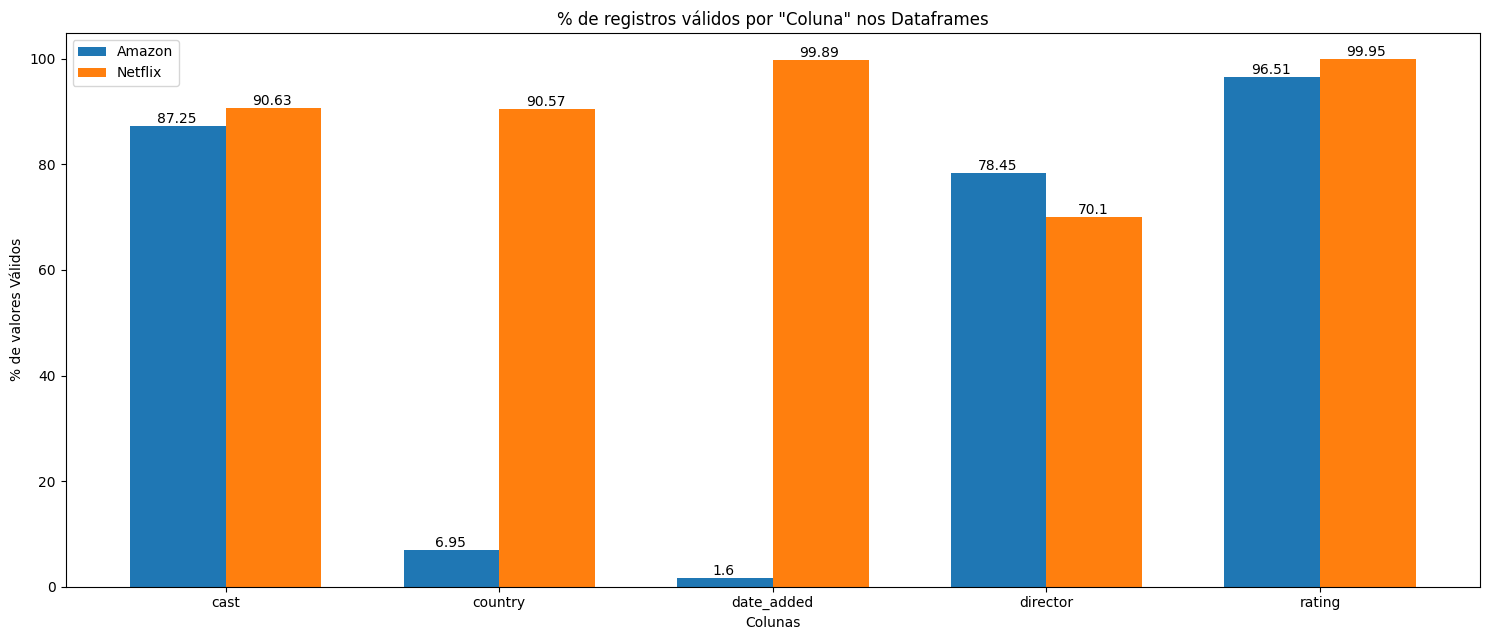

In [77]:
#-------------------------------------------------------------------------------
# Configuração do gráfico com quantidade de registros
#-------------------------------------------------------------------------------

# Para facilitar a análise do resultado coloquei para exibir
# novamente a informação com total de registros de cada coluna e dataframe
exibirDadosCompletosRegistros()

valoresAmazon = valoresAmazonFiltrado[colunaPorcentagem]
valoresNetflix = valoresNetflixFiltrado[colunaPorcentagem]

# Definir a largura das barras
largura_barra = 0.35

# Criação da figura e do eixo
fig, ax = plt.subplots(figsize=(15, 6.5))

# Plotar as barras usando as colunas específicas para os valores e categorias
rects1 = ax.bar(np.arange(len(valoresAmazon)), valoresAmazon, largura_barra, label='Amazon')
rects2 = ax.bar(np.arange(len(valoresNetflix)) + largura_barra, valoresNetflix, largura_barra, label='Netflix')

# Adicionar rótulos, título e legenda
ax.set_ylabel('% de valores Válidos')
ax.set_xlabel('Colunas')
ax.set_title('% de registros válidos por "Coluna" nos Dataframes')

# Definição posicionamento das barras no eixo X
ax.set_xticks(np.arange(len(colunas_grafico_barras)) + largura_barra / 2)

# Adiciona os valores acima de cada barra
posicao_valor_barra = 0.17

for i, valor in enumerate(valoresAmazon):
    ax.text(i - largura_barra/2 + posicao_valor_barra, valor, str(valor), ha='center', va='bottom')

for i, valor in enumerate(valoresNetflix):
    ax.text(i + largura_barra/2 + posicao_valor_barra, valor, str(valor), ha='center', va='bottom')

# Legenda no eixo X
ax.set_xticklabels(colunas_grafico_barras)
ax.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

**Conclusão:** Ao inverter o resultado, exibindo os registros que consideramos válidos, confirmamos que o dataset Netflix vai gerar um volume maior para a análise.
Também podemos verificar que as colunas:
*  'date_added' para o dataset Amazon tem um baixo índice de valores.
*  'country' para o dataset Amazon vai fornece um baixo volume de dados.

## Coluna show_id

Vamos analisar a coluna "show_id" que contêm código iguais nos dois datasets mas para títulos diferentes.  

Por este motivo vamos utilizar a coluna título(title) ao inves do show_id.  

Para ilustrar nossa conclusão, arbitrariamente, selecionamos os ids "s1", "s2" e "s3" em cada dataset para que possamos concluir que se trata de títulos diferentes.

In [78]:
print(f'Listando registros pela coluna "{colunaOrigem}"')
separadorLinha()

print(f'Consulta de registros pelo id com origem {descricaoAmazon}')
separadorLinha()
print(df_Amazon[df_Amazon[colunaShowId].isin(['s9', 's1', 's7'])][[colunaShowId, colunaTitle]])
separadorLinha(True)

print(f'Consulta de registros pelo id com origem {descricaoNetflix}')
separadorLinha()
print(df_Netflix[df_Netflix[colunaShowId].isin(['s9', 's1', 's7'])][[colunaShowId, colunaTitle]])

Listando registros pela coluna "origem_dataframe"
------------------------------------------------------------------------------------------------------------------------------------------------------
Consulta de registros pelo id com origem Amazon
------------------------------------------------------------------------------------------------------------------------------------------------------
  show_id                title
0      s1  The Grand Seduction
6      s7            Hired Gun
8      s9      Global Meltdown


------------------------------------------------------------------------------------------------------------------------------------------------------
Consulta de registros pelo id com origem Netflix
------------------------------------------------------------------------------------------------------------------------------------------------------
  show_id                             title
0      s1              Dick Johnson Is Dead
6      s7  My Little Pony: A New Ge

## Conclusão na análise dos dados brutos

Verificamos que a coluna 'country', que **será utilizada nesta análise**, possui uma grande proporção de valores nulos com a fonte de dados Amazon Prime, mas uma boa quantidade de registros para o dataframe Netflix.

Para uma análise mais ampla, considerando apenas os títulos, gêneros e anos de produção e países que produziram a obra podemos afirmar que o resultado será mais satisfatório.

Para responder minha pergunta, vou manter as informações considerando tambem a origem dos dados (Amazon Prime e Netflix), ciente da proporção de dados que teremos para cada origem dos dados.

A lista abaixo contem as colunas que serão utilizadas na análise e não foram identificadas com dados inválidos:
*   title
*   type
*   release_year
*   listed_in

# **Consolidação dos dataframes Amazon e Netflix**
---

Criando o dataframe **df_filmes_series** com informações dos dois arquivos e com as colunas renomeadas para um nome mais amigável.
Abaixo o "de-para" das colunas carregas e sua nova descrição:

*   title --> titulo
*   type --> tipo
*   country --> pais
*   release_year --> ano_lancamento
*   listed_in --> genero

##Configuração

In [79]:
# configuração
subtitulo = 'Títulos duplicados para mesmo ano'
msgSemDados = 'Nenhum dado duplicado foi encontrado'
msgRegistroComTitulos = 'Registros com mesmo título com as colunas'
colunasParaComparar = [colunaTitle, colunaReleaseYear]
total_registros_df_Netflix = len(df_Netflix)
total_registros_df_Amazon = len(df_Amazon)

##Ajustando títulos duplicados

In [80]:
# Contabilizando e exibindo resultado
separadorLinha()
print(f'{descricaoNetflix}')
print(subtitulo)

# Contabilizando títulos duplicados para mesmo ano
df_netflix_titulos_ano_duplicados = df_Netflix[colunasParaComparar].value_counts()

# Gerando dataframe só com os titulos duplicados
df_somente_duplicado = df_netflix_titulos_ano_duplicados[df_netflix_titulos_ano_duplicados > 1]
titulos_duplicados = df_somente_duplicado.index.get_level_values(colunaTitle).unique().tolist()

#Exibindo resultado com contagem acima de 1
df_resultado = df_netflix_titulos_ano_duplicados[df_netflix_titulos_ano_duplicados > 1]

separadorLinha()
if len(df_resultado) > 0:
  print(f'{msgRegistroComTitulos} {colunasParaComparar}')
  print(df_resultado)
else:
  print(f'{msgSemDados} com as colunas {colunasParaComparar}')

separadorLinha()
print(f'Total de registros: {total_registros_df_Netflix}')
separadorLinha(True)

print(f'{descricaoAmazon}')
print(subtitulo)

# Contabilizando títulos duplicados para mesmo ano
df_amazon_titulos_ano_duplicados = df_Amazon[colunasParaComparar].value_counts()

# Gerando dataframe só com os titulos duplicados
df_somente_duplicado = df_netflix_titulos_ano_duplicados[df_netflix_titulos_ano_duplicados > 1]
titulos_duplicados.extend(df_somente_duplicado.index.get_level_values(colunaTitle).unique().tolist())

#Exibindo resultado com contagem acima de 1
df_resultado = df_amazon_titulos_ano_duplicados[df_amazon_titulos_ano_duplicados > 1]

separadorLinha()
if len(df_resultado) > 0:
  print(f'{msgRegistroComTitulos} {colunasParaComparar}')
  print(df_resultado)
else:
  print(f'{msgSemDados} com as colunas {colunasParaComparar}')

separadorLinha()
print(f'Total de registros: {total_registros_df_Amazon}')
separadorLinha()

------------------------------------------------------------------------------------------------------------------------------------------------------
Netflix
Títulos duplicados para mesmo ano
------------------------------------------------------------------------------------------------------------------------------------------------------
Registros com mesmo título com as colunas ['title', 'release_year']
title   release_year
22-Jul  2018            2
Feb-09  2018            2
15-Aug  2019            2
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Total de registros: 8809


------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon
Títulos duplicados para mesmo ano
---------------------------------------------------------------------------------------------

**Conclusão:** Somente o dataframe Netflix retorna resultados com titulos duplicados para o mesmo ano.  

Vamos listar as informações com todas as colunas e analisar a diferença dos registros.

In [81]:
print(f'Exibindo informações completas dos títulos duplicados no {descricaoDataframeNetflix}')
separadorLinha()
print(df_Netflix[df_Netflix[colunaTitle].isin(titulos_duplicados)].sort_values(by=colunaTitle).to_string(index=False))

Exibindo informações completas dos títulos duplicados no Dataframe Netflix
------------------------------------------------------------------------------------------------------------------------------------------------------
show_id    type  title           director                                                                                                                                                    cast                        country       date_added  release_year rating duration                            listed_in                                                                                                                                              description
  s3963   Movie 15-Aug Swapnaneel Jayakar                            Rahul Pethe, Mrunmayee Deshpande, Adinath Kothare, Vaibhav Mangale, Jaywant Wadkar, Satish Pulekar, Naina Apte, Uday Tikekar                          India   March 29, 2019          2019  TV-14  124 min Comedies, Dramas, Independent Movies On 

**Conclusão:** A coluna "show_id" possui valor diferente para cada título duplicado mas com as mesmas informações nas demais colunas, e por isso foi ignorado no processo de remoção das duplicidades.  

Vamos remover as duplicidades considerando apenas as colunas "title" e    "release_year"

In [82]:
# Remove duplicatas, considerando as colunas 'title' e 'release_year'
df_Netflix = df_Netflix.drop_duplicates(subset=[colunaTitle, colunaReleaseYear])

In [83]:
print(f'Verificando se ainda há linhas duplicadas no {descricaoDataframeNetflix}')
separadorLinha()

# Contabilizando títulos duplicados para mesmo ano
df = df_Netflix[colunasParaComparar].value_counts()

#Exibindo resultado com contagem acima de 1
df_resultado2 = df[df > 1]

if len(df_resultado2) > 0:
  print(f'{msgRegistroComTitulos} {colunasParaComparar}')
  print(df_resultado2)
else:
  print(f'{msgSemDados} com as colunas {colunasParaComparar}')

separadorLinha()

print(f'Total de registros: {len(df_Netflix)}')

# Atualizando a variavel com a quantidade de registros para dataframe Netflix
total_registros_df_Netflix = len(df_Netflix)

Verificando se ainda há linhas duplicadas no Dataframe Netflix
------------------------------------------------------------------------------------------------------------------------------------------------------
Nenhum dado duplicado foi encontrado com as colunas ['title', 'release_year']
------------------------------------------------------------------------------------------------------------------------------------------------------
Total de registros: 8806


##Tratamento de missings

Antes de consolidar os dados, remover valores ausentes.  

Será realizado o tratamento dos dados ausentes nas colunas country, identificados na carga dos dados.

In [84]:
#varivael para mensagem
msg_percentual ='% do dataset foi mantido para ser analisado'

# Removendo coluna "country" com valores nulos
df_amazon_sem_paises_nulos = df_Amazon.dropna(subset=[colunaCountry])
df_netflix_sem_paises_nulos = df_Netflix.dropna(subset=[colunaCountry])

# Em cada dataframe adicionar a coluna 'Origem', informando a origem do dado (arquivo Amazon ou Netflix)
df_amazon_sem_paises_nulos.insert(0, colunaOrigem, 'Amazon')
df_netflix_sem_paises_nulos.insert(0, colunaOrigem, 'Netflix')

# Exibindo resultado
separadorLinha()
print(f'Total de registros no dataframe {descricaoAmazon} antes da limpeza dos nulos: {total_registros_df_Amazon}')
separadorLinha()
print(f'Resultado: Aproximadamente, { round((len(df_amazon_sem_paises_nulos)*100)/total_registros_df_Amazon) }{msg_percentual}')
separadorLinha()
print(f'Registros em cada coluna no dataframe {descricaoAmazon}')
separadorLinha()
print(df_amazon_sem_paises_nulos.count())
separadorLinha(True)

print(f'Total de registros no dataframe {descricaoNetflix} antes da limpeza dos nulos: {total_registros_df_Netflix}')
separadorLinha()
print(f'Resultado: Aproximadamente, { round((len(df_netflix_sem_paises_nulos)*100)/total_registros_df_Netflix) }{msg_percentual}')
separadorLinha()
print(f'Registros em cada coluna no dataframe {descricaoNetflix}')
separadorLinha()

print(df_netflix_sem_paises_nulos.count())

------------------------------------------------------------------------------------------------------------------------------------------------------
Total de registros no dataframe Amazon antes da limpeza dos nulos: 9668
------------------------------------------------------------------------------------------------------------------------------------------------------
Resultado: Aproximadamente, 7% do dataset foi mantido para ser analisado
------------------------------------------------------------------------------------------------------------------------------------------------------
Registros em cada coluna no dataframe Amazon
------------------------------------------------------------------------------------------------------------------------------------------------------
origem_dataframe    672
show_id             672
type                672
title               672
director            569
cast                655
country             672
date_added           26
release_year  

Verificamos acima o resultado com todas as colunas dos dataframes, após a limpeza dos dados.  

A remoção das colunas que nâo serão selecionadas para análise será executado na consolidação dos dados.

Conforme resultado acima, menos de 10% do dataset Amazon Prime será utilizando.

##Consolidando o dataframe Netflix e Amazon

Ações realizadas
*  Consolidado os dataframes Amazon Prime e Netflix.
*  Eliminação das colunas que nao serão utilizadas nesta análise.
*  Removendo coluna "country" com valores nulos.

In [85]:
# Consolidado os dataframes Amazon e Netflix
# Na consolidação já estou eliminando as colunas que nao vou utilizar nesta análise
# Removendo coluna "country" com valores nulos
df_filmes_series_original = pd.concat([
    df_amazon_sem_paises_nulos.loc[:, [colunaOrigem, colunaTitle, colunaType, colunaCountry, colunaReleaseYear, colunaListedIn]],
    df_netflix_sem_paises_nulos.loc[:, [colunaOrigem, colunaTitle, colunaType, colunaCountry, colunaReleaseYear, colunaListedIn]]
    ])

#renomeando colunas para valores padronizados com minúsculo e nomes mais amigáveis
df_filmes_series_original = df_filmes_series_original.rename(columns={
    colunaTitle: colunaTitulo,
    colunaType: colunaTipo,
    colunaCountry: colunaPais,
    colunaReleaseYear: colunaAnoLancamento,
    colunaListedIn: colunaGenero})

df_filmes_series = df_filmes_series_original.copy()
df_filmes_series = df_filmes_series.dropna(how='any')

# total dos registros consolidados
total_registros = len(df_filmes_series)

Verificando o resultado.

In [86]:
df_filmes_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8648 entries, 0 to 8808
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   origem_dataframe  8648 non-null   object
 1   titulo            8648 non-null   object
 2   tipo              8648 non-null   object
 3   paises_origem     8648 non-null   object
 4   ano_lancamento    8648 non-null   int64 
 5   genero            8648 non-null   object
dtypes: int64(1), object(5)
memory usage: 472.9+ KB


**Consultando a estrutura das colunas**  
A coluna ano_lancamento com tipo numérico e as demais colunas com valor do tipo string (definida como object)

In [87]:
df_filmes_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8648 entries, 0 to 8808
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   origem_dataframe  8648 non-null   object
 1   titulo            8648 non-null   object
 2   tipo              8648 non-null   object
 3   paises_origem     8648 non-null   object
 4   ano_lancamento    8648 non-null   int64 
 5   genero            8648 non-null   object
dtypes: int64(1), object(5)
memory usage: 472.9+ KB


In [88]:
df_filmes_series.head()

,origem_dataframe,titulo,tipo,paises_origem,ano_lancamento,genero
0,Amazon,The Grand Seduction,Movie,Canada,2014,"Comedy, Drama"
1,Amazon,Take Care Good Night,Movie,India,2018,"Drama, International"
2,Amazon,Secrets of Deception,Movie,United States,2017,"Action, Drama, Suspense"
3,Amazon,Pink: Staying True,Movie,United States,2014,Documentary
4,Amazon,Monster Maker,Movie,United Kingdom,1989,"Drama, Fantasy"


### Verificando valores nulos

In [89]:
df_filmes_series.isnull().sum()

,0
origem_dataframe,0
titulo,0
tipo,0
paises_origem,0
ano_lancamento,0
genero,0


### Matriz (Visualização matricial da nulidade do dataset)

<Axes: >

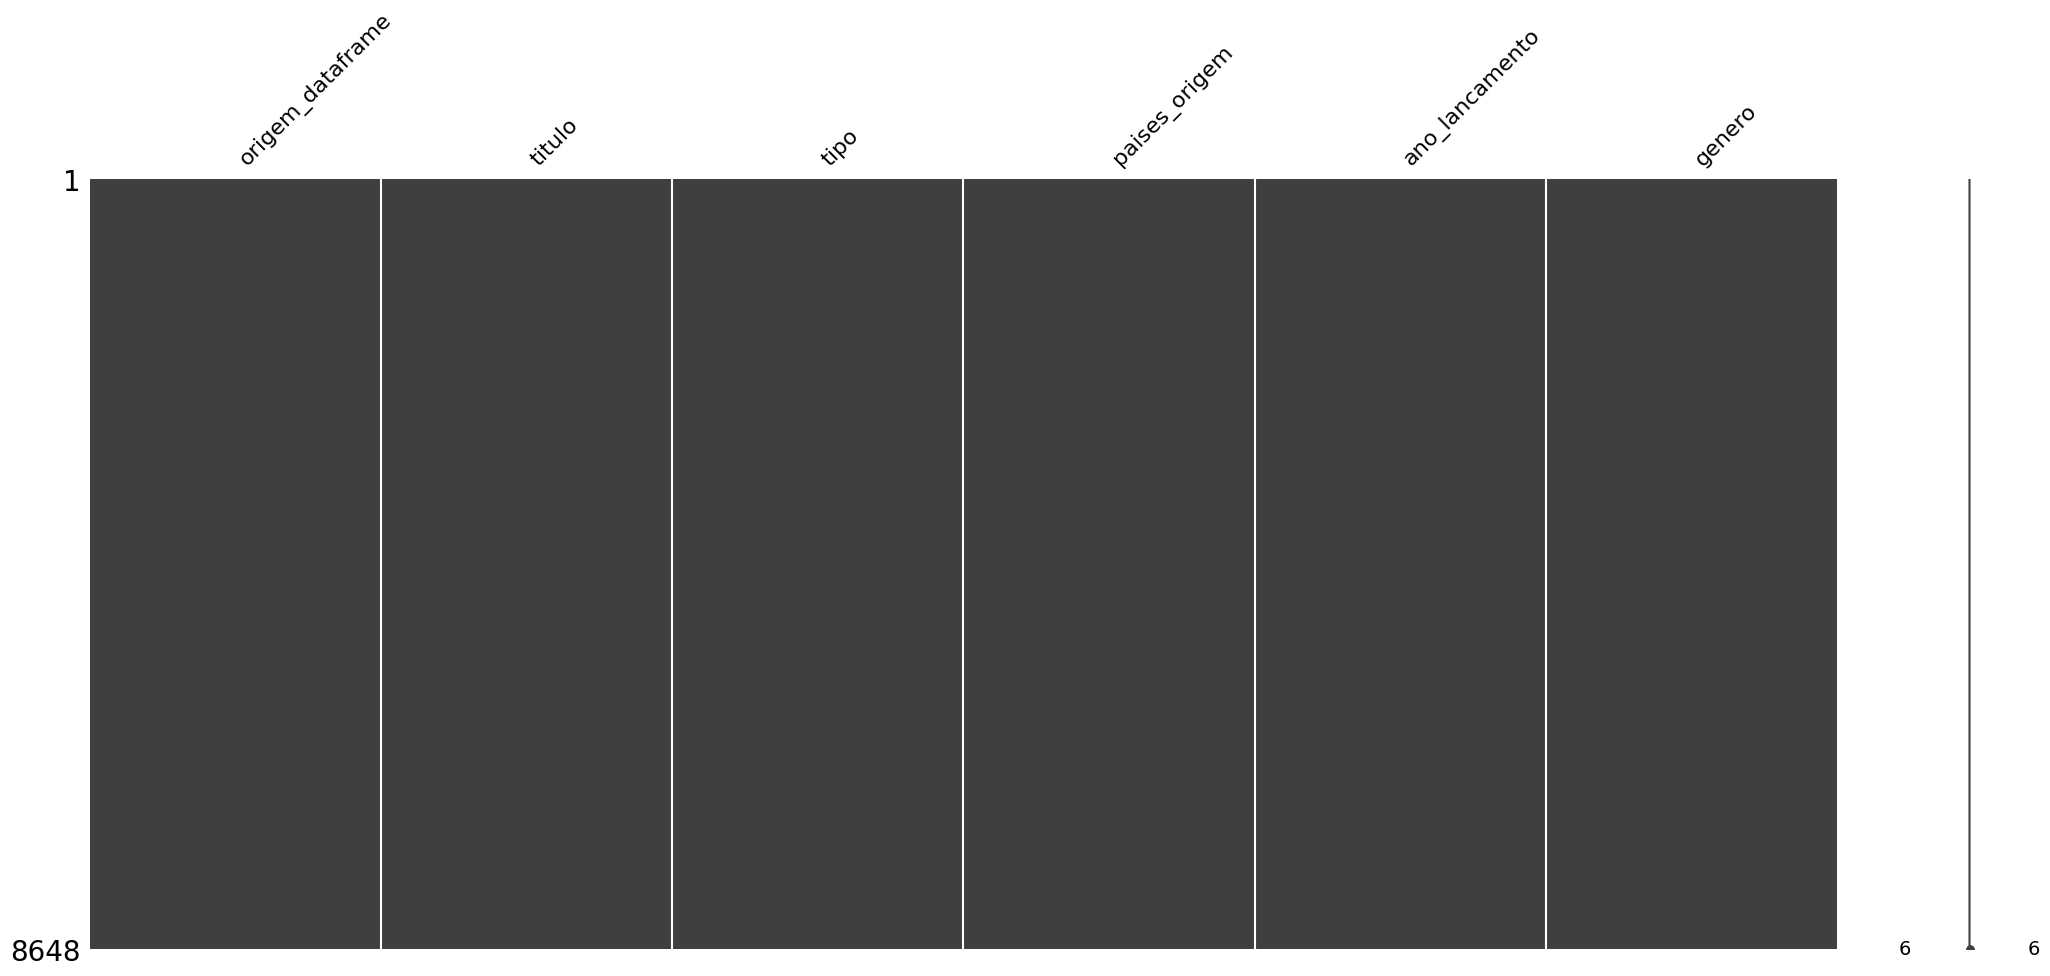

In [90]:
# Gerando matriz
col = list(df_filmes_series.columns)

# Criando novo dataframe contendo todas as colunas do dataframe original
df_filmes_series_sem_missings = df_filmes_series[col[:]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_filmes_series_sem_missings)

Em todas as colunas do dataframe consolidado nao há identificação de valores ausentes.

# **Análise dos dados consolidados**
---

Avaliando os dados existentes em cada coluna do dataframe consolidado

## Coluna tipo

Listando todos tipos existentes

In [91]:
print("Tipos existentes no dataframe consolidado")
separadorLinha()
print(df_filmes_series[colunaTipo].unique())
separadorLinha(True)

Tipos existentes no dataframe consolidado
------------------------------------------------------------------------------------------------------------------------------------------------------
['Movie' 'TV Show']


------------------------------------------------------------------------------------------------------------------------------------------------------


Criando variavel com valor dos dois tipos de títulos para uso nas consultas.

In [92]:
# Criando variaveis tipo
tipoMovie = 'Movie'
tipoTVShow = 'TV Show'

## Coluna ano_lancamento

**Observação:** Como estamos trabalhando com duas fonte de dados, antes de consolidar, devemos analisar se vamos definir os limites do Ano de Lançamento para que possa avaliar no mesmo range de anos de lançamentos.

Todos os anos existentes

In [93]:
df_anos_agrupados = df_filmes_series.sort_values(by=colunaAnoLancamento)[colunaAnoLancamento].unique()

In [94]:
print("Anos cadastrados")
separadorLinha()
print(df_anos_agrupados)
separadorLinha(True)

Anos cadastrados
------------------------------------------------------------------------------------------------------------------------------------------------------
[1939 1942 1943 1944 1945 1946 1947 1951 1954 1955 1956 1958 1959 1960
 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2024]


------------------------------------------------------------------------------------------------------------------------------------------------------


In [95]:
print('Primeiro ano no cadastro:')
separadorLinha()
print(f'{descricaoAmazon}: {df_filmes_series[df_filmes_series[colunaOrigem] == descricaoAmazon][colunaAnoLancamento].min()}')
print(f'{descricaoNetflix}: {df_filmes_series[df_filmes_series[colunaOrigem] == descricaoNetflix][colunaAnoLancamento].min()}')
separadorLinha(True)
print('Último ano no cadastro:')
separadorLinha()
print(f'{descricaoAmazon}: {df_filmes_series[df_filmes_series[colunaOrigem] == descricaoAmazon][colunaAnoLancamento].max()}')
print(f'{descricaoNetflix}: {df_filmes_series[df_filmes_series[colunaOrigem] == descricaoNetflix][colunaAnoLancamento].max()}')

Primeiro ano no cadastro:
------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon: 1939
Netflix: 1942


------------------------------------------------------------------------------------------------------------------------------------------------------
Último ano no cadastro:
------------------------------------------------------------------------------------------------------------------------------------------------------
Amazon: 2021
Netflix: 2024


Antes de avaliar a quantidade de títulos, está definido temporariamente o range em 1949 - 2021.

### Contabilizando a quantidade de títulos por ano de lançamento

Definindo a consulta entre os anos de 1949 - 2021, conforme análise da coluna Ano de Lançamento e listando os anos com mais títulos em cada catálogo.

Variáveis para consulta

In [96]:
# Definindo as variáveis do ano início e ano fim das consultas
ano_inicio = 1949
ano_fim = 2021
maxAnos = 20
msgQtdAnosLancamentos = f'Quantidade dos {maxAnos} anos com mais lançamentos - '

##### Contabilizando a quantidade de títulos por ano de lançamento para cada origem dos dados

In [97]:
print(f"Frequência dos anos no dataframe {descricaoAmazon}.")
separadorLinha()
print(df_filmes_series[df_filmes_series[colunaOrigem] == descricaoAmazon][colunaAnoLancamento].value_counts().head(maxAnos))

separadorLinha(True)

# Quantidade de filmes lançados pela Amazon por ano
df_filmes_ano_lancamento_amazon = df_filmes_series[
     (df_filmes_series[colunaOrigem] == descricaoAmazon) &
      df_filmes_series[colunaAnoLancamento].between(ano_inicio, ano_fim)
     ].groupby(colunaAnoLancamento)[colunaTitulo].count().reset_index()

print(f"Média dos atributos {descricaoAmazon}.")
separadorLinha()
# média dos atributos numéricos do dataset
print(df_filmes_ano_lancamento_amazon.describe().loc['mean'])

Frequência dos anos no dataframe Amazon.
------------------------------------------------------------------------------------------------------------------------------------------------------
ano_lancamento
2019    111
2020     91
2018     69
2021     59
2017     56
2016     48
2015     21
2014     20
2011     15
2012     14
2013     14
2007     13
2008     12
2009     12
2006     12
2002     10
1995      6
2004      6
2003      6
1994      5
Name: count, dtype: int64


------------------------------------------------------------------------------------------------------------------------------------------------------
Média dos atributos Amazon.
------------------------------------------------------------------------------------------------------------------------------------------------------
ano_lancamento    1993.019608
titulo              13.117647
Name: mean, dtype: float64


In [98]:
maxAnos = 40

print(f"Frequência dos anos no dataframe {descricaoNetflix}.")
separadorLinha()
print(df_filmes_series[df_filmes_series[colunaOrigem] == descricaoNetflix][colunaAnoLancamento].value_counts().head(maxAnos))

separadorLinha(True)

# Quantidade de filmes lançados pela Netflix por ano
df_filmes_ano_lancamento_netflix = df_filmes_series[
     (df_filmes_series[colunaOrigem] == descricaoNetflix) &
      df_filmes_series[colunaAnoLancamento].between(ano_inicio, ano_fim)
     ].groupby(colunaAnoLancamento)[colunaTitulo].count().reset_index()

print(f"Média dos atributos {descricaoNetflix}.")
separadorLinha()
# média dos atributos numéricos do dataset
print(df_filmes_ano_lancamento_netflix.describe().loc['mean'])

Frequência dos anos no dataframe Netflix.
------------------------------------------------------------------------------------------------------------------------------------------------------
ano_lancamento
2018    1037
2017     966
2019     912
2020     852
2016     838
2015     516
2021     383
2014     334
2013     270
2012     222
2011     179
2010     178
2009     142
2008     132
2006      95
2007      87
2005      79
2004      62
2003      59
2002      50
2001      44
1999      38
1997      37
2000      36
1998      36
1993      27
1995      24
1992      22
1996      21
1994      21
1990      20
1988      17
1989      16
1982      15
1991      15
1986      13
1979      11
1981      11
1984      11
1980      11
Name: count, dtype: int64


------------------------------------------------------------------------------------------------------------------------------------------------------
Média dos atributos Netflix.
----------------------------------------------------------------

**Conclusão:**  
Com base nos resultados gerados com as estatísticas de frequência e médias confirmamos que o maior volume ocorre nos anos 2000 mas nenhuma identificação de outliers.

A seguir vamos avaliar os resultados com os gráficos.

###Gráfico Ano Lançamento x Quantidade de Titulos

Configuração para o gráfico

In [99]:
#Titulo dos gráficos
titulo = 'Quantidade de Títulos x Ano Lançamento'

####Histograma

O resultado gerou uma distribuição do tipo "platô" e sem picos que se detaque, onde os dados não estão seguindo uma única distribuição com uma única média, pois estamos considerando a contabilização de títulos por ano de lançamento.

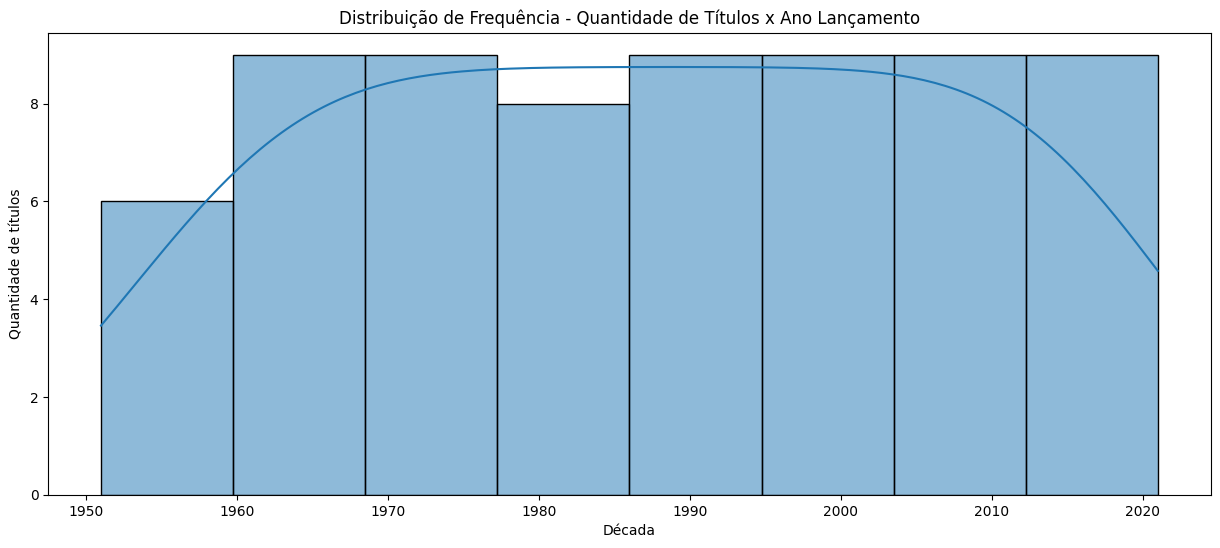

In [100]:
# dataframe para o grafico
df_grafico = df_filmes_series[
      df_filmes_series[colunaAnoLancamento].between(ano_inicio, ano_fim)
     ].groupby(colunaAnoLancamento)[colunaTitulo].count().reset_index()

plt.figure(figsize=(15, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df_grafico[colunaAnoLancamento], kde=True)
plt.title(f'Distribuição de Frequência - {titulo}')
plt.xlabel('Década')
plt.ylabel('Quantidade de títulos')
plt.show()

####Boxplot

Foi gerado os gráficos considerando dois intervalos, antes e depois de 1999 e nenhum Outlier foi encontrado com os gráficos do Bosplot.

#####Gerando bloxplot até 1999, quando há menos títulos.

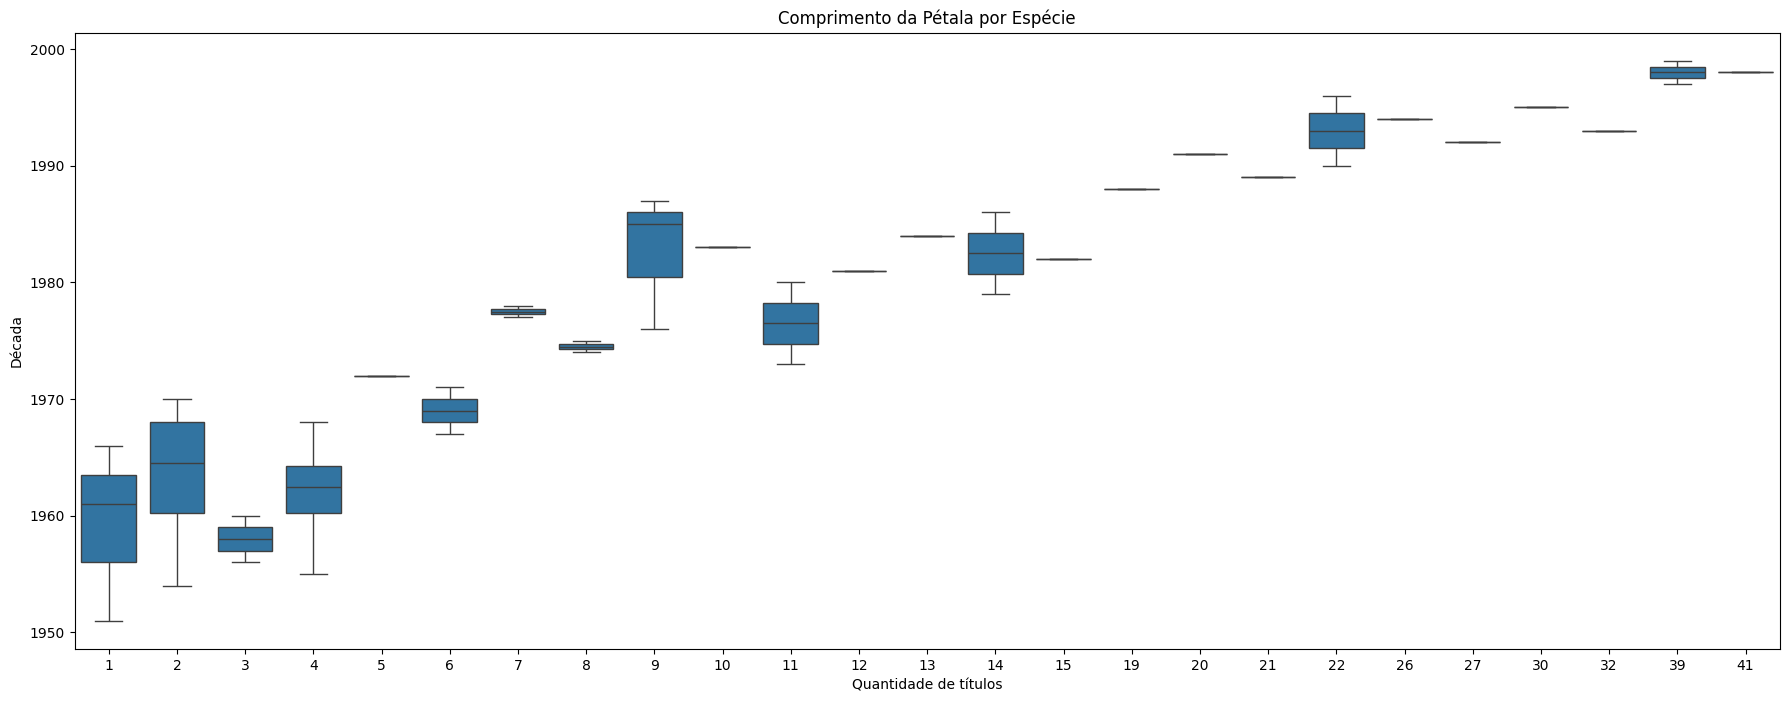

In [101]:
# dataframe para o grafico
df_grafico = df_filmes_series[
      df_filmes_series[colunaAnoLancamento].between(ano_inicio, 1999)
     ].groupby(colunaAnoLancamento)[colunaTitulo].count().reset_index()

# Boxplot
plt.figure(figsize=(22,8))
sns.boxplot(x=colunaTitulo, y=colunaAnoLancamento, data=df_grafico)
plt.title('Comprimento da Pétala por Espécie')
plt.ylabel('Década')
plt.xlabel('Quantidade de títulos')
plt.show()

#####Gerando o bloxplot a partir dos anos 2000 quando houve um aumento exponencial de títulos.

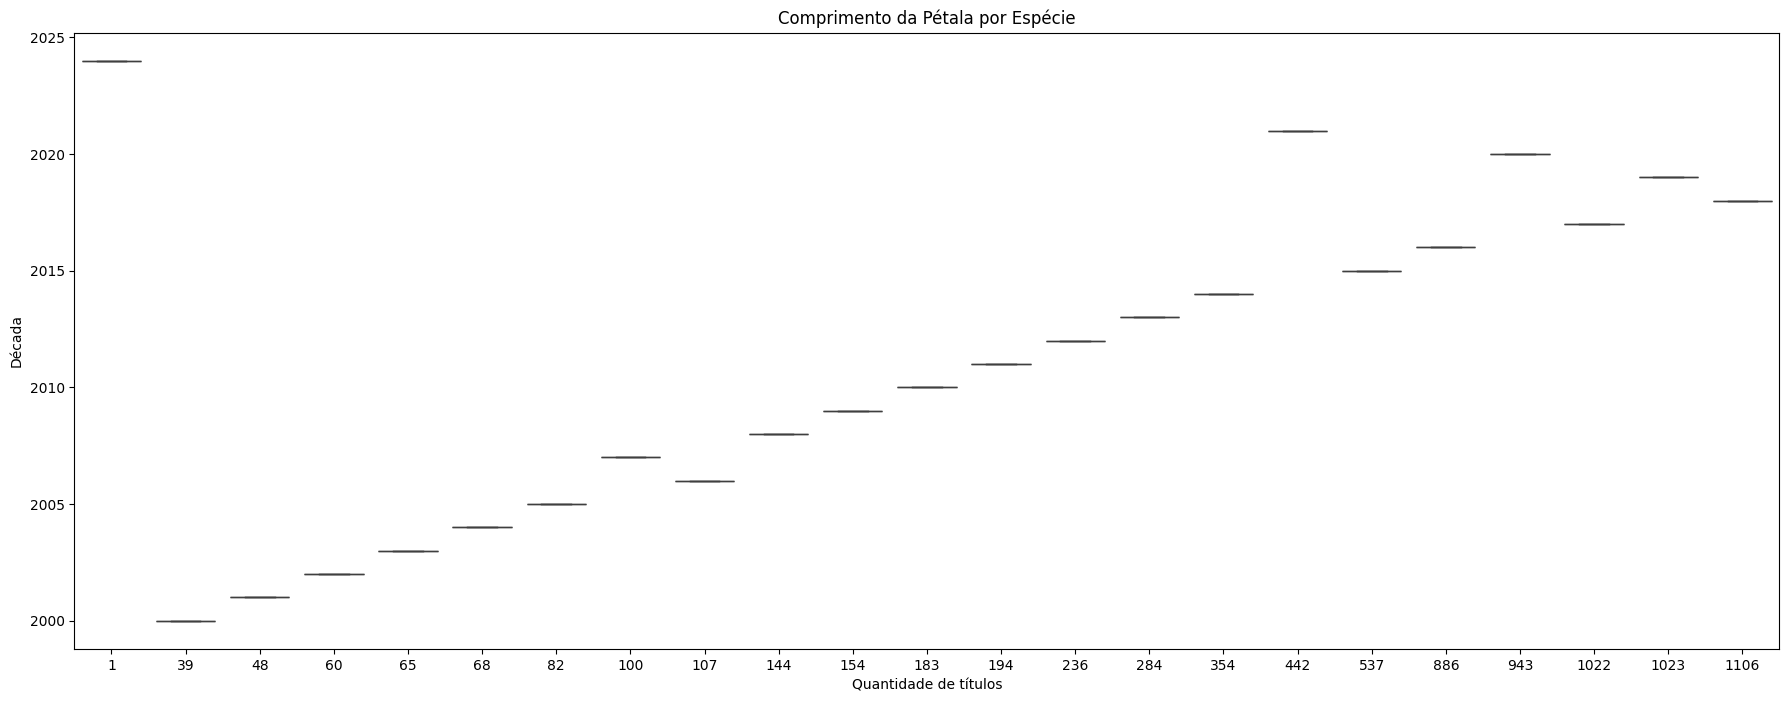

In [102]:
df_grafico = df_filmes_series[
      df_filmes_series[colunaAnoLancamento].between(2000, 2025)
     ].groupby(colunaAnoLancamento)[colunaTitulo].count().reset_index()

# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(22,8))
sns.boxplot(x=colunaTitulo, y=colunaAnoLancamento, data=df_grafico)
plt.title('Comprimento da Pétala por Espécie')
plt.ylabel('Década')
plt.xlabel('Quantidade de títulos')
plt.show()

In [103]:
df_filmes_ano_lancamento_netflix.describe()

,ano_lancamento,titulo
count,67.000000,67.000000
mean,1987.955224,118.805970
std,19.560654,249.733569
min,1954.000000,1.000000
25%,1971.500000,5.000000
50%,1988.000000,15.000000
75%,2004.500000,70.500000
max,2021.000000,1037.000000


**Observação:** O catálogo da Amzon Prime possui títulos produzidos até 2021 e a Netflix até 2024. Na consolidação vamos limitar o cadastro de títulos até 2021 padronizar esse range de anos.

Em uma leitura menos detalhada, vemos que o catálogo aumenta a quantidade de títulos a partir de 1973.  

Como vamos agrupar os anos em décadas, vamos reavaliar essa quantidade novamente.

## Coluna titulo

Verificando após a conslidação, se ainda existe títulos duplicados para o mesmo ano e origem dos dados

In [104]:
# Configuração
colunasParaComparar = [colunaTitulo, colunaAnoLancamento, colunaOrigem]

# Contabilizando e exibindo resultado
print(subtitulo)

# Contabilizando títulos duplicados para mesmo ano
df_titulos_ano_duplicados = df_filmes_series[colunasParaComparar].value_counts()

# Gerando dataframe só com os titulos duplicados
df_somente_duplicado = df_titulos_ano_duplicados[df_titulos_ano_duplicados > 1]
titulos_duplicados = df_somente_duplicado.index.get_level_values(colunaTitulo).unique().tolist()

#Exibindo resultado com contagem acima de 1
df_resultado = df_titulos_ano_duplicados[df_titulos_ano_duplicados > 1]

separadorLinha()
if len(df_resultado) > 0:
  print(f'{msgRegistroComTitulos} {colunasParaComparar}')
  print(df_resultado)
else:
  print(f'{msgSemDados} com as colunas {colunasParaComparar}')

separadorLinha()
print(f'Total de registros: {len(df_titulos_ano_duplicados)}')
separadorLinha(True)

Títulos duplicados para mesmo ano
------------------------------------------------------------------------------------------------------------------------------------------------------
Nenhum dado duplicado foi encontrado com as colunas ['titulo', 'ano_lancamento', 'origem_dataframe']
------------------------------------------------------------------------------------------------------------------------------------------------------
Total de registros: 8648


------------------------------------------------------------------------------------------------------------------------------------------------------


Conferindo a quantidade de ocorrências por título, ano e origem dos dados.  

Por haver duas origem de dados, o valor acima de 2 pode ser um valor duplicado.  

Caso exista será avaliado isoladamente.

In [105]:
# Contar as ocorrências de cada valor na coluna 'titulo'
contagem_titulos = df_filmes_series[colunaTitulo].value_counts()
titulos_contagem_result = contagem_titulos[contagem_titulos > 1]

listaTitulos = []
for titulo in titulos_contagem_result:
    listaTitulos.append(titulo)

# Imprimir a contagem
print(f'{len(titulos_contagem_result)} títulos com mais de um registro no {descricaoDataframeConsolidado} \nAgrupados com as colunas {colunasParaComparar}')
separadorLinha()
print('Titulos encontrados')
separadorLinha()
print(titulos_contagem_result.sort_values(ascending=False))


33 títulos com mais de um registro no Dataframe df_filmes_series 
Agrupados com as colunas ['titulo', 'ano_lancamento', 'origem_dataframe']
------------------------------------------------------------------------------------------------------------------------------------------------------
Titulos encontrados
------------------------------------------------------------------------------------------------------------------------------------------------------
titulo
Catch Me If You Can             2
Tracers                         2
Pari                            2
Dostana                         2
Tortilla Soup                   2
Joker                           2
Inconceivable                   2
Patriot Games                   2
Same Kind of Different as Me    2
Once Upon a Time in London      2
Ungli                           2
Stuart Little 2                 2
She's Out of My League          2
A Family Man                    2
Hero                            2
World Trade Center   

Verificando se existe registro com valor acima de 2 registros

In [106]:
titulos_contagem_result = contagem_titulos[contagem_titulos > 2]

if len(titulos_contagem_result) > 0:
  print(f'{len(titulos_contagem_result)} títulos com mais de dois registros no {descricaoDataframeConsolidado} \nAgrupados com as colunas {colunasParaComparar}')
else:
  print(f'Nenhum título encontrado com mais de dois registros no {descricaoDataframeConsolidado}')

Nenhum título encontrado com mais de dois registros no Dataframe df_filmes_series


Conforme mencionado, a quantidade de registros igual a 2 era esperada, considerando que a Amazon e Netflix podem oferecer o mesmo produto.

In [107]:
# Gerando lista de titulos duplicados com origem distinta e mesmo ano
contagem_titulos = df_filmes_series[colunaTitulo].value_counts()
titulos_contagem_result = contagem_titulos[contagem_titulos > 1]
df_titulos_duplicados = pd.DataFrame(titulos_contagem_result)
titulos_duplicados = df_titulos_duplicados.index.tolist()

# Consultando
df_titulos_duplicados = df_filmes_series[df_filmes_series[colunaTitulo].isin(titulos_duplicados)]
print(df_titulos_duplicados.sort_values(by=[colunaTipo, colunaTitulo]).to_string(index=False))

origem_dataframe                       titulo    tipo                 paises_origem  ano_lancamento                                             genero
          Amazon                 A Family Man   Movie         United States, Canada            2017                                              Drama
         Netflix                 A Family Man   Movie         Canada, United States            2016                                             Dramas
          Amazon                  Be Somebody   Movie                 United States            2016                                             Comedy
         Netflix                  Be Somebody   Movie                 United States            2016                  Comedies, Dramas, Romantic Movies
          Amazon                      Beowulf   Movie United States, United Kingdom            2007                                    Action, Fantasy
         Netflix                      Beowulf   Movie United States, United Kingdom           

Foi verificado um titulo com mesmo nome e origem diferente que não pode ser considerado uma duplicidade ou mesmo produto, conforme podemos ver no último registro do resultado acima.
Vamos isolar esse dados para avaliar.

In [108]:
# Consultando a exceção para entender se é o mesmo produto
titulo_filtro = 'City of Ghosts'

df_titulos_duplicados_excecao = df_filmes_series[df_filmes_series[colunaTitulo].isin(titulos_duplicados)]
print(df_titulos_duplicados_excecao[df_titulos_duplicados_excecao[colunaTitulo] == titulo_filtro].sort_values(by=[colunaTipo, colunaTitulo]).to_string(index=False))

origem_dataframe         titulo    tipo paises_origem  ano_lancamento      genero
          Amazon City of Ghosts   Movie United States            2017 Documentary
         Netflix City of Ghosts TV Show United States            2021    Kids' TV


O título "City of Ghosts" esta com a gênero e classificação diferente e o ano de lançamento com intervalo grande com o outro registro.  
Com essas informaçoes podemos afirmar que se trata de outro produto com o mesmo nome.

## Coluna pais_de_origem

Vamos avaliar se o cadastro de países está correto.  
Essa coluna é composta de uma lista de paises, separados por "vírgula" e para avaliar os países cadastrados, o processo vai separar a string com virgulas em uma lista e gerar uma nova lista onde cada registro é um país.

In [109]:
print("Países cadastrados")
separadorLinha()

valores_divididos = df_filmes_series[colunaPais].str.split(',')

# Aplanar a lista
valores_aplanados = list(itertools.chain.from_iterable(valores_divididos))

# Remover os valores de paises duplicados
valores_tratados = removeEspacoLista(list(valores_aplanados)) # Removendo espaço nos valores da lista
valores_unicos = set(valores_tratados)

# 4. Converter para lista
paises_cadastrados = removeEspacoLista(list(valores_unicos))
sorted(paises_cadastrados)

Países cadastrados
------------------------------------------------------------------------------------------------------------------------------------------------------


['',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Monaco',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicarag

**OBSERVAÇÃO:** Se algum registro listar páises duplciados, na contabilização de países por título essa informação será tratada.

Utilizando a lista carregada de países, vamos validar o cadastro de paises.

In [110]:
print('Países cadastrados que não existe')
separadorLinha()

# Criando dataframe para exibir o resultado
df_paises_verificados = criarDataFrameVazio([colunaPais, colunaResultados])
indice = 0

# Validando cadastros válidos (sem valor nulo ou NaN)
for linha in paises_cadastrados:
  if valorNaN.lower() != str(linha).lower():
    nova_linha = {colunaPais: linha, colunaResultados: ehUmPaisValido(linha)}
    df_paises_verificados.loc[indice] = nova_linha
    indice += 1


print(df_paises_verificados[df_paises_verificados[colunaResultados] != msgOk].to_string(index=False))

# Criando lista de países inexistentes, se houver
listaPaisesInexistentes = df_paises_verificados[df_paises_verificados[colunaResultados] != msgOk][colunaPais].tolist()

Países cadastrados que não existe
------------------------------------------------------------------------------------------------------------------------------------------------------
paises_origem                resultado
 West Germany West Germany não existe 
 Soviet Union Soviet Union não existe 
 East Germany East Germany não existe 


**Observação:** Acima podemos verificar que há cadastros de países que nao existem mais.

*  Para o caso de West Germany e East Germany, podemos discutir em substituir para Germany ou se essa informação tem algum valor histórico.  
Pois com a queda do muro de Berlim, as duas divisões da Alemanha, voltaram a compor um único país.
*  Para o caso da União Soviética, como foi desmembrada em vários países, pódemos considerar como um páis.

**Conclusão:** como não é um erro de digitação, ou descrição de um país inválidos e mesmo que não exista mais, vVamos manter os dados com seus valores históricos.

Vamos verificar a quantidade de registros e ano para esses países.

In [111]:
# Quantidade de filmes lançados por ano em cada país inexistente
df_linhas_paises_inexistentes = pd.DataFrame()

print(f"Quantidade de lançamentos no {descricaoDataframeConsolidado} com os países inexistentes.")
separadorLinha()

for pais in listaPaisesInexistentes:
  # Cria um dicionário com os dados da linha
  dados_linha = df_filmes_series[df_filmes_series[colunaPais].str.contains(pais, na=False)]
  # Converte o dicionário em um DataFrame
  df_linhas_paises_inexistentes = pd.concat([df_linhas_paises_inexistentes, dados_linha], ignore_index=True)

print(f'Total de registros: {len(df_linhas_paises_inexistentes)}')
separadorLinha()
print(df_linhas_paises_inexistentes.sort_values(by=colunaAnoLancamento).to_string(index=False))

Quantidade de lançamentos no Dataframe df_filmes_series com os países inexistentes.
------------------------------------------------------------------------------------------------------------------------------------------------------
Total de registros: 9
------------------------------------------------------------------------------------------------------------------------------------------------------
origem_dataframe                              titulo    tipo                                               paises_origem  ano_lancamento                                                     genero
         Netflix Willy Wonka & the Chocolate Factory   Movie                   United States, East Germany, West Germany            1971         Children & Family Movies, Classic Movies, Comedies
         Netflix Willy Wonka & the Chocolate Factory   Movie                   United States, East Germany, West Germany            1971         Children & Family Movies, Classic Movies, Comedies
    

Foram encontrados 18 registros contendo estes países e somente na origem dos dados Netflix. Neste caso poderíamos descartar os dados sem grande impacto.

## Coluna genero

Listando alguns registros com origem Amazon Prime e Netflix.

In [112]:
print("Gêneros cadastrados")
separadorLinha()

valores_divididos = df_filmes_series[colunaGenero].str.split(',')

# Aplanar a lista
valores_aplanados = list(itertools.chain.from_iterable(valores_divididos))

# Remover os valores de paises duplicados
valores_tratados = removeEspacoLista(list(valores_aplanados)) # Removendo espaço nos valores da lista
valores_unicos = set(valores_tratados)


# 4. Converter para lista (opcional)
generos_cadastrados = removeEspacoLista(list(valores_unicos))
sorted(generos_cadastrados)

Gêneros cadastrados
------------------------------------------------------------------------------------------------------------------------------------------------------


['Action',
 'Action & Adventure',
 'Adventure',
 'Animation',
 'Anime',
 'Anime Features',
 'Anime Series',
 'Arthouse',
 'Arts',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Comedy',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Documentary',
 'Docuseries',
 'Drama',
 'Dramas',
 'Entertainment',
 'Faith & Spirituality',
 'Faith and Spirituality',
 'Fantasy',
 'Historical',
 'Horror',
 'Horror Movies',
 'Independent Movies',
 'International',
 'International Movies',
 'International TV Shows',
 'Kids',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ',
 'LGBTQ Movies',
 'Military and War',
 'Movies',
 'Music & Musicals',
 'Music Videos and Concerts',
 'Reality TV',
 'Romance',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Sci-fi',
 'Science & Nature TV',
 'Science Fiction',
 'Spanish-Language TV Shows',
 'Special Interest',
 'Sports',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 

Analisando os gêneros acima, é possível ver alguns generos com descrição distinta mas que podem ser consolidados por ter o mesmo contexto e objetivo.  
<br>
**A seguir, vamos detalhar a proposta de consolidação dos gêneros cadastrados com mesmo contexto ou de gêneros em que a descrição se atualizou com o mercado.**

###Classificação dos Gêneros em Grupo de Gêneros

O coluna com o valor do gênero será mantida, e vamos criar a coluna **'genero_grupo'** conforme a proposta abaixo.  

Dessa forma podemos avaliar um padrão mais amplo dos gêneros e caso seja necessário, consultar pelo gênero de cada registro no mesmo Grupo de Gênero.

**Ação & Aventura:**
*  'Action'
*  'Action & Adventure'
*  'Adventure'
*  'TV Action & Adventure'

**Justificativa:** Todos se referem a conteúdos no gênero de ação, perseguições e histórias com elementos de aventura.  

---

**Animação (incluindo Anime):**
*  'Animation'
*  'Anime'
*  'Anime Features'
*  'Anime Series'

**Justificativa:** Anime é uma forma de animação. Agrupar facilita a análise de todo o conteúdo animado.  

---

**Filmes Clássicos:**
*  'Classic Movies'
*  'Cult Movies'
*  'Arthouse' (Conform pesquisa muitos filmes arthouse são considerados clássicos ou cult).

**Justificativa:** Filmes que se destacam por sua importância histórica, cultural ou por terem um público fiel.  

---

**Comédia:**
*  'Comedies'
*  'Comedy'
*  'TV Comedies'
*  'Stand-Up Comedy'
*  'Stand-Up Comedy & Talk Shows'

**Justificativa:** Abrange todos os formatos e subtipos de conteúdo humorístico.  

---

**Documentário:**
*  'Documentaries'
*  'Documentary'
*  'Docuseries'

**Justificativa:** Todos os tipos de conteúdo não-ficcional e com base em fatos e pesquisas.  

---

**Drama:**
*  'Drama'
*  'Dramas'
*  'TV Dramas'

**Justificativa:** Categoria ampla para conteúdos focados em narrativa e desenvolvimento de personagens.  

---

**Espiritualidade e Fé:**
* 'Faith & Spirituality'
* 'Faith and Spirituality'

**Justificativa:** Mesmo contexto.  

---

Fantasia & Sci-Fi:
* 'Fantasy'
* 'Sci-Fi & Fantasy'
* 'Sci-fi'
* 'Science Fiction'
* 'TV Sci-Fi & Fantasy'

**Justificativa:** Gêneros que envolve elementos sobrenaturais, mundos imaginários e tecnologia avançada.  

---

**Horror:**
* 'Horror'
* 'Horror Movies'
* 'TV Horror'

**Justificativa:** Possuem o mesmo contexto.  

---

**Infantil & Família:**
*  'Children & Family Movies'
*  'Kids'
*  "Kids' TV"
*  'Young Adult Audience' (apesar do gênero "Young Adult" ser uma categoria separada, agrupamos em "Kids" porque seu conteúdo é predominantemente leve/apropriado para essa faixa etária.)

**Justificativa:** Conteúdo voltado para crianças e famílias.  

---

**Internacional:**
*  'International'
*  'International Movies'
*  'International TV Shows'
*  'Korean TV Shows'
*  'Spanish-Language TV Shows'

**Justificativa:** Como as empresas foca no no mercado americano, todo o conteúdo não-americano ou que não se encaixa claramente em outras categorias geográficas mais específicas.  
Vi casos mais específicos como "Korean TV Shows" e "Spanish-Language TV Shows"  mas pode ser sub-categorias de "Internacional" para uma análise de alto nível.  

---

**LGBTQ+:**
*  'LGBTQ'
*  'LGBTQ Movies'

**Justificativa:** Mesmo contexto.  

---

**Música:**
*  'Music & Musicals'
*  'Music Videos and Concerts'

**Justificativa:** Todo o conteúdo relacionado à música.

---

**Reality Show:**
*  'Reality TV'
*  'Unscripted' (De acordo com uma pesquisa pessoal no google essa descrição é usada nos catálogos como sinônimo de reality TV)

**Justificativa:** Conteúdo televisivo sem roteiro pré-definido.

---

**Romance:**
*  'Romance'
*  'Romantic Movies'
*  'Romantic TV Shows'

**Justificativa:** Conteúdo com foco em relacionamentos românticos.

---

**Esportes:**
*  'Sports'
*  'Sports Movies'

**Justificativa:** Conteúdo relacionado a esportes.

---

**Suspense & Thriller:**
*  'Suspense'
*  'Thriller'
*  'Thrillers'
*  'TV Thrillers'

**Justificativa:** Gêneros que foca em tensão, mistério e reviravoltas.

---

**TV Shows (Diversos/Gerais):**
*  'TV Shows'
*  'Classic & Cult TV'
*  'Teen TV Shows'
*  'Science & Nature TV'
*  'Talk Show and Variety'
*  'British TV Shows'

**Justificativa:** Categoria abrangente para séries de televisão que não se encaixam perfeitamente em outras categorias.

---

**Categorias que nao serão 'Agrupada' por que não houve relação:**

*  Arts
*  Entertainment
*  Historical
*  Independent Movies
*  Movies (Genérico, mas não optei pelo descarte por ter um grande volume de títulos com esse gênero)
*  Special Interest
*  'Western'
*  'and Culture' (Genérico sem um relacionamento direto)
*  Militar & Guerra (Não houve relação com outro gênero existente no cadastro)  
*  Crime (Não houve relação com outro gênero existente no cadastro.)

In [113]:
# Criando lista dos grupos de gênero
genero_mapping = {
    'Action': 'Ação & Aventura',
    'Action & Adventure': 'Ação & Aventura',
    'Adventure': 'Ação & Aventura',
    'TV Action & Adventure': 'Ação & Aventura',

    'Animation': 'Animação (incluindo Anime)',
    'Anime': 'Animação (incluindo Anime)',
    'Anime Features': 'Animação (incluindo Anime)',
    'Anime Series': 'Animação (incluindo Anime)',

    'Classic Movies': 'Filmes Clássicos',
    'Cult Movies': 'Filmes Clássicos',
    'Arthouse': 'Filmes Clássicos',

    'Comedies': 'Comédia',
    'Comedy': 'Comédia',
    'TV Comedies': 'Comédia',
    'Stand-Up Comedy': 'Comédia',
    'Stand-Up Comedy & Talk Shows': 'Comédia',

    'Crime TV Shows': 'Crime',

    'Documentaries': 'Documentário',
    'Documentary': 'Documentário',
    'Docuseries': 'Documentário',

    'Drama': 'Drama',
    'Dramas': 'Drama',
    'TV Dramas': 'Drama',

    'Faith & Spirituality': 'Espiritualidade e Fé',
    'Faith and Spirituality': 'Espiritualidade e Fé',

    'Fantasy': 'Fantasia & Sci-Fi',
    'Sci-Fi & Fantasy': 'Fantasia & Sci-Fi',
    'Sci-fi': 'Fantasia & Sci-Fi',
    'Science Fiction': 'Fantasia & Sci-Fi',
    'TV Sci-Fi & Fantasy': 'Fantasia & Sci-Fi',

    'Horror': 'Horror',
    'Horror Movies': 'Horror',
    'TV Horror': 'Horror',

    'Children & Family Movies': 'Infantil & Família',
    'Kids': 'Infantil & Família',
    "Kids' TV": 'Infantil & Família',
    'Young Adult Audience': 'Infantil & Família',

    'International': 'Internacional',
    'International Movies': 'Internacional',
    'International TV Shows': 'Internacional',
    'Korean TV Shows': 'Internacional',
    'Spanish-Language TV Shows': 'Internacional',

    'LGBTQ': 'LGBTQ+',
    'LGBTQ Movies': 'LGBTQ+',

    'Military and War': 'Militar & Guerra',

    'Music & Musicals': 'Música',
    'Music Videos and Concerts': 'Música',

    'Reality TV': 'Reality Show',
    'Unscripted': 'Reality Show',

    'Romance': 'Romance',
    'Romantic Movies': 'Romance',
    'Romantic TV Shows': 'Romance',

    'Sports': 'Esportes',
    'Sports Movies': 'Esportes',

    'Suspense': 'Suspense & Thriller',
    'Thriller': 'Suspense & Thriller',
    'Thrillers': 'Suspense & Thriller',
    'TV Thrillers': 'Suspense & Thriller',

    'TV Shows': 'TV Shows (Diversos/Gerais)',
    'Classic & Cult TV': 'TV Shows (Diversos/Gerais)',
    'Teen TV Shows': 'TV Shows (Diversos/Gerais)',
    'Science & Nature TV': 'TV Shows (Diversos/Gerais)',
    'Talk Show and Variety': 'TV Shows (Diversos/Gerais)',
    'British TV Shows': 'TV Shows (Diversos/Gerais)',

    # grupo de gênero que vai conteer apenas um gênero
    'Arts': 'Arts',
    'Independent Movies': 'Independent Movies',
    'Historical' : 'Historical',
    'Entertainment': 'Entertainment',
    'Special Interest': 'Special Interest',
    'and Culture': 'and Culture',
    'Western': 'Western',
    'Militar & Guerra': 'Militar & Guerra',
    'Crime' : 'Crime',
    'Movies': 'Movies'
}

###Gráficos

Geramos os gráficos abaixo e vamos avaliar a tendência de lançamentos por gênero.

####Gráfico de barras horizontal com quantidade de gêneros

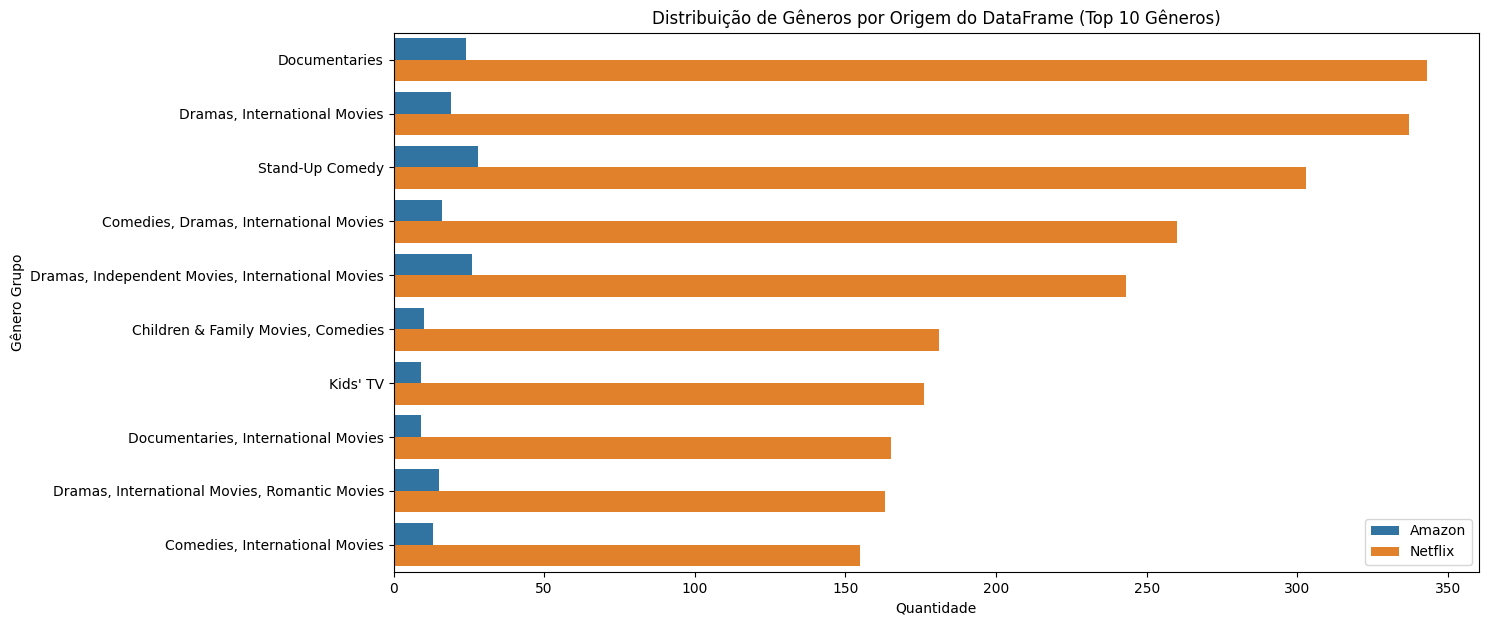

In [114]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df_filmes_series, y='genero', hue='origem_dataframe',
              order=df_filmes_series['genero'].value_counts().nlargest(10).index, palette='tab10')
plt.title('Distribuição de Gêneros por Origem do DataFrame (Top 10 Gêneros)')
plt.xlabel('Quantidade')
plt.ylabel('Gênero Grupo')
plt.legend(title='')
plt.show()

Considerando a proporção dos dados, podemos ver que em cada empresa há uma tendência similar de gêneros.
A Amazon Prime e Netflix tendem a possuir uma quantidade maior em:
*  Documentários
*  Drama
*  Filmes Independentes
*  Filmes Internacionais
*  Stand-up Comedy.

Como vemos neste gráfico, há descrição de gêneros que poderão ser agupados com a proposta de Grupo de Gêneros.

####Gráfico de barras horizontal com a quantidade de países que produziram

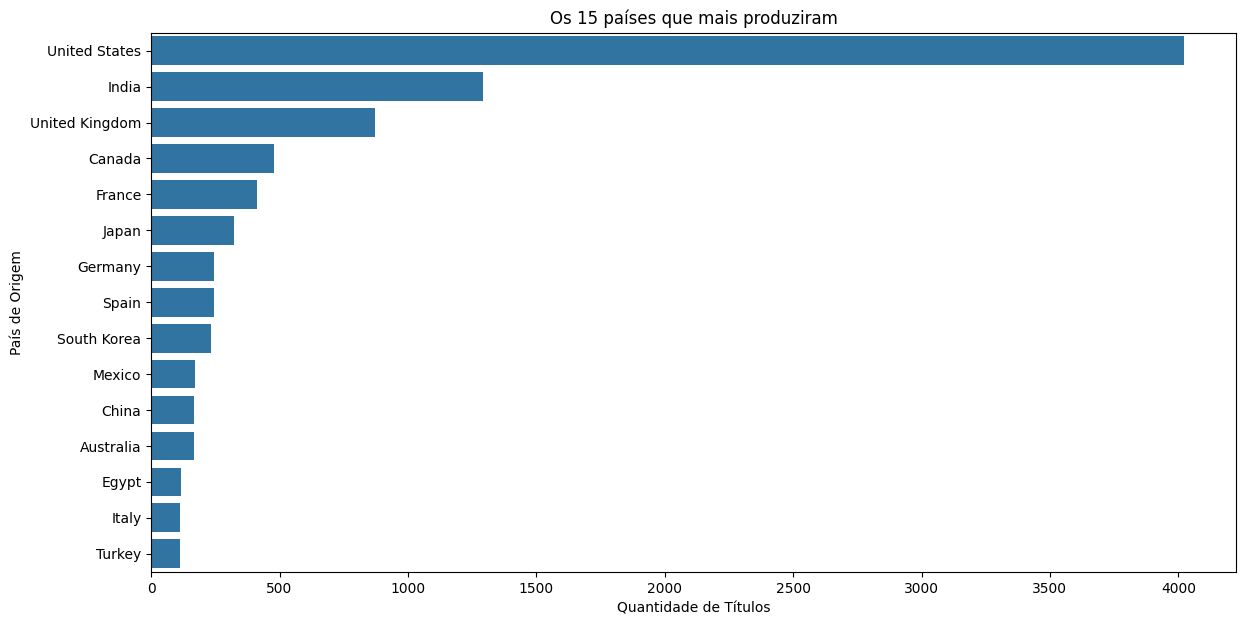

In [115]:
# Primeiro, "achate" a coluna paises_origem para contar ocorrências de cada país
todos_paises = df_filmes_series[colunaPais].apply(lambda x: [c.strip() for c in x.split(',') if c.strip()])
flat_paises = [country for sublist in todos_paises for country in sublist]

countries_series = pd.Series(flat_paises)

plt.figure(figsize=(14, 7))
top_countries = countries_series.value_counts().nlargest(15).index
sns.countplot(y=countries_series, order=top_countries)

plt.title('Os 15 países que mais produziram')
plt.xlabel('Quantidade de Títulos')
plt.ylabel('País de Origem')
plt.show()

Neste gráfico já era esperado que os Estados Unidos fosse o maior produtor, mas lembrando que muitos títulos exibem um grupo de países.

A surpresa é a Índia se destacar como a segunda maior produtora.

####Gráfico de barras horizontal com a quantidade de títulos por Ano de Lançamento

Vamos gerar um gráfico até 1970

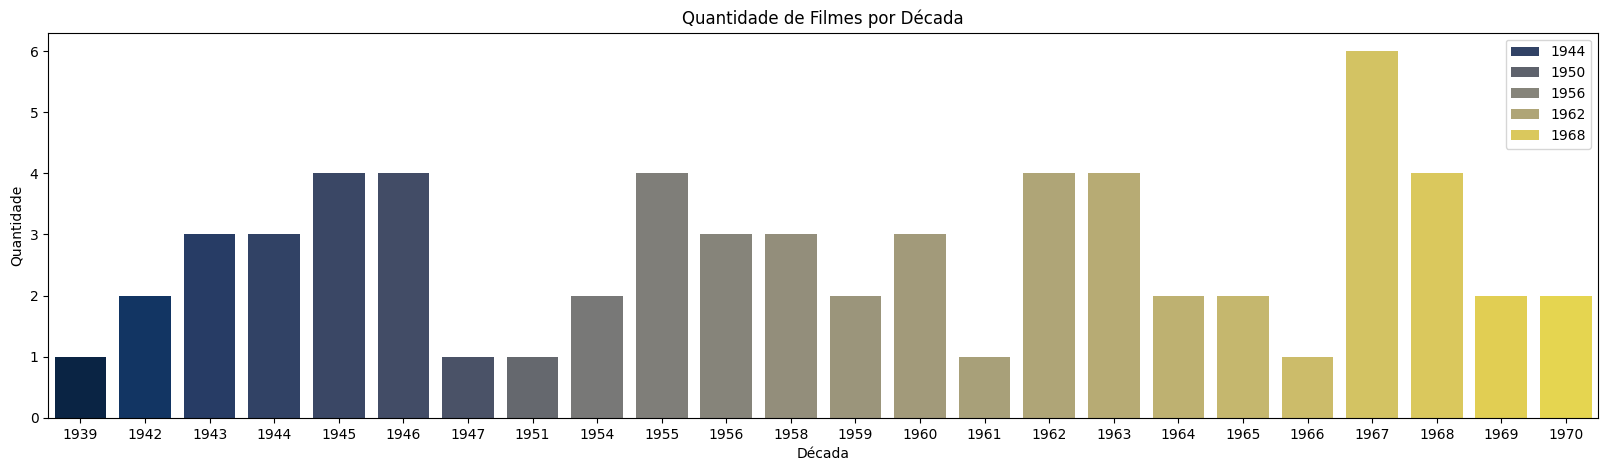

In [116]:
df_grafico_anos = df_filmes_series[df_filmes_series[colunaAnoLancamento] < 1971]

plt.figure(figsize=(20, 5))
sns.countplot(data=df_grafico_anos.sort_values(colunaAnoLancamento), x=colunaAnoLancamento, palette='cividis', hue=colunaAnoLancamento)
plt.title('Quantidade de Filmes por Década')
plt.legend(title='')
plt.xlabel('Década')
plt.ylabel('Quantidade')
plt.show()

Vamos gerar um gráfico de 1971 a 1999

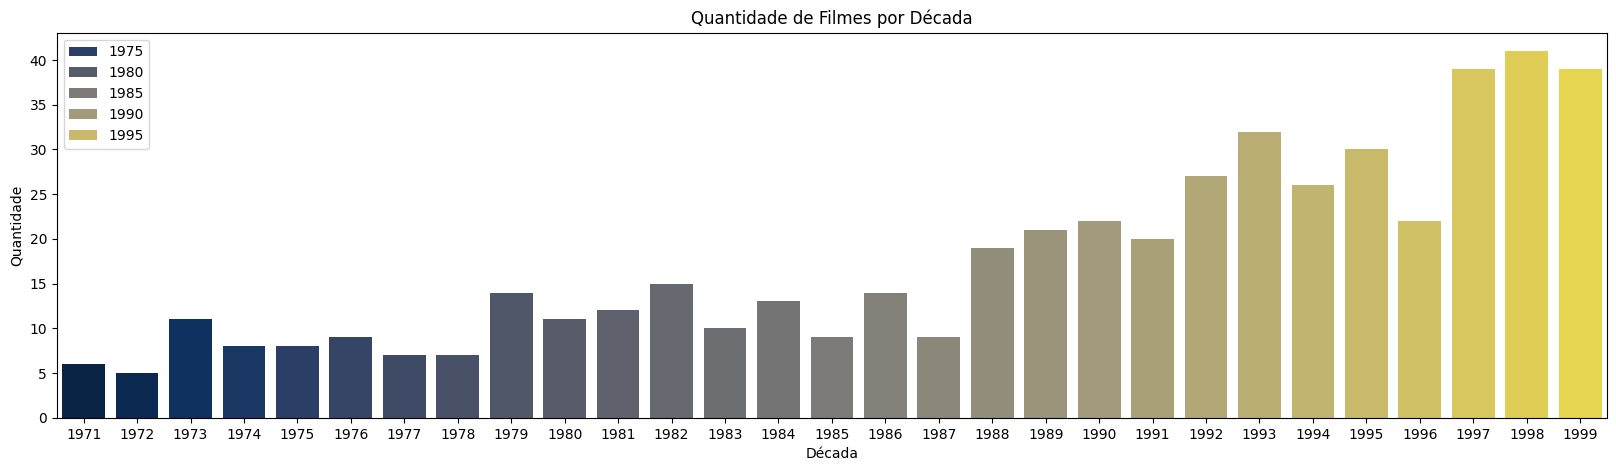

In [117]:
df_grafico_anos = df_filmes_series[df_filmes_series[colunaAnoLancamento].between(1971,1999)]

plt.figure(figsize=(20, 5))
sns.countplot(data=df_grafico_anos.sort_values(colunaAnoLancamento), x=colunaAnoLancamento, palette='cividis', hue=colunaAnoLancamento)
plt.title('Quantidade de Filmes por Década')
plt.legend(title='')
plt.xlabel('Década')
plt.ylabel('Quantidade')
plt.show()

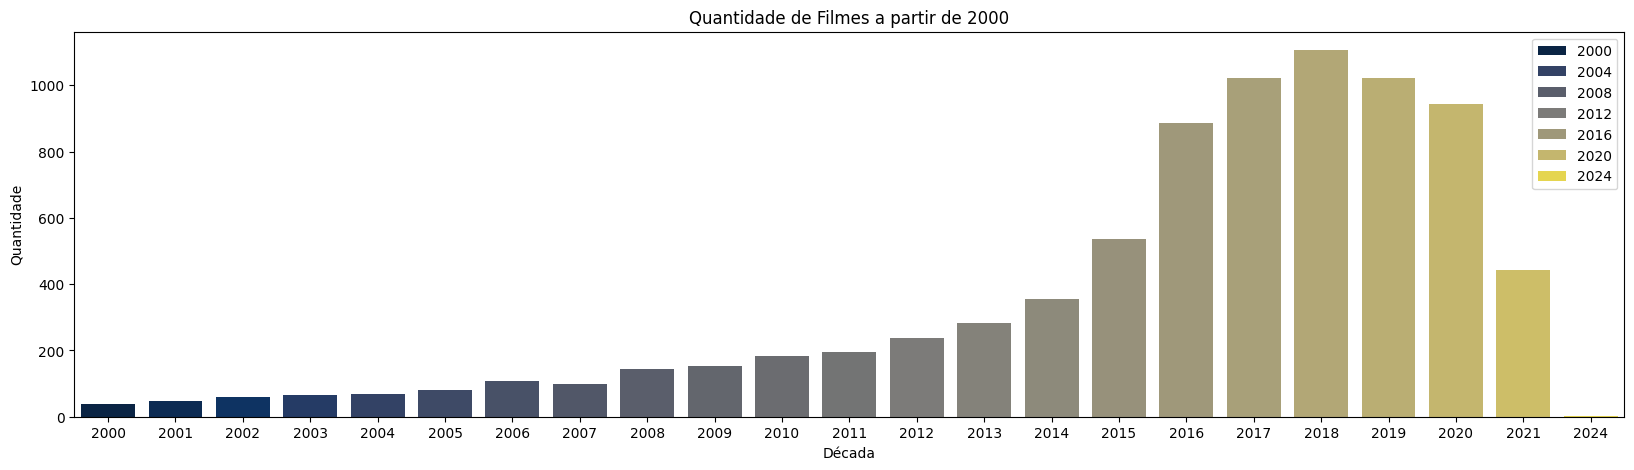

In [118]:
df_grafico_anos = df_filmes_series[df_filmes_series[colunaAnoLancamento] > 1999]

plt.figure(figsize=(20, 5))
sns.countplot(data=df_grafico_anos.sort_values(colunaAnoLancamento), x=colunaAnoLancamento, palette='cividis', hue=colunaAnoLancamento)
plt.title('Quantidade de Filmes a partir de 2000')
plt.legend(title='')
plt.xlabel('Década')
plt.ylabel('Quantidade')
plt.show()

##Matriz de correlação

A seguir vamos verificar há uma baixo nível de correlação entre as variáveis do dataframe, indicando uma relação fraca entre as variáveis.

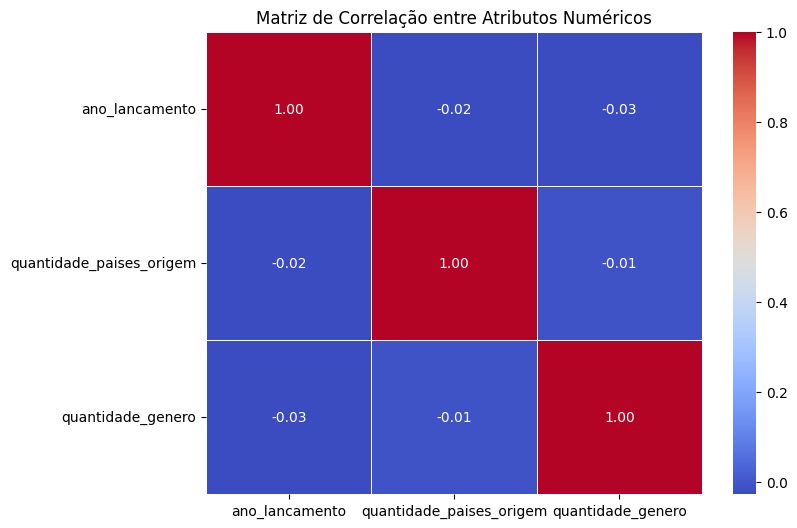

------------------------------------------------------------------------------------------------------------------------------------------------------
Matriz de Correlação:
------------------------------------------------------------------------------------------------------------------------------------------------------


,ano_lancamento,quantidade_paises_origem,quantidade_genero
ano_lancamento,1.000000,-0.024082,-0.027741
quantidade_paises_origem,-0.024082,1.000000,-0.010480
quantidade_genero,-0.027741,-0.010480,1.000000


In [119]:
df_matriz = df_filmes_series.copy()

# Criando a coluna 'quantidade_paises_origem'
# Quantidade de países em cada string, lidando com NaNs e strings vazias
df_matriz[colunaQtdPaisOrigem] = df_matriz[colunaPais].apply(lambda x: len([c.strip() for c in str(x).split(',') if c.strip()]) if pd.notna(x) and str(x).strip() != '' else 0)

# Criando a coluna 'quantidade_genero'
df_matriz[colunaQtdGenero] = df_matriz[colunaGenero].apply(lambda x: len([g.strip() for g in str(x).split(',') if g.strip()]) if pd.notna(x) and str(x).strip() != '' else 0)

# Selecionando as colunas numéricas para a matriz de correlação
colunas_numericas = [colunaAnoLancamento, colunaQtdPaisOrigem, colunaQtdGenero]

# Calculando a matriz de correlação
matriz_correlacao = df_matriz[colunas_numericas].corr()

# Exibindo a matriz de correlação usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Atributos Numéricos')
plt.show()

separadorLinha()
print("Matriz de Correlação:")
separadorLinha()

matriz_correlacao

##Conclusão

O resultado destaca que a partir dos anos 2000 as empresas conseguiram adquirir e produzir mais títulos para seu catálogo, pois média de títulos ganha um aumento expressivo na quantidade de títulos após o ano 2000.  
<br>

**Observação:** Para evitar a "falsa" impressão, vale observar nos gráficos ao valor na coluna Y, que podem aparentar o mesmo volume de dados, mas estao ajustados pelos valores máximos em cada consulta.

#**Estatísticas**
---

##Variavéis numéricas

Neste dataframe temos como variável numérica o valor do ano de lançamento, quantidade de títulos e Década.

###Estatística descritiva

In [120]:
print('Estatística descritiva')
print(f'Total de registros: {len(df_filmes_series)}')
separadorLinha(True)
print(f'Variável Numérica: {colunaAnoLancamento}')
separadorLinha()
df_filmes_series.describe()

Estatística descritiva
Total de registros: 8648


------------------------------------------------------------------------------------------------------------------------------------------------------
Variável Numérica: ano_lancamento
------------------------------------------------------------------------------------------------------------------------------------------------------


,ano_lancamento
count,8648.000000
mean,2013.808626
std,9.203080
min,1939.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


Podemos concluir

###Média

In [121]:
# média dos atributos numéricos do dataset
df_filmes_series.describe().loc['mean']

,mean
ano_lancamento,2013.808626


Como já vimos nos gráficos podemos confirmar que a média do maior volume de dados ocorre nos anos 2000.
Vamos avaliar se haverá corte para as títulos até 1999.

##Variáveis Categóricas
---

Neste dataframe as colunas genero, genero_grupo, origem_dataframe, paises_origem são categóricas

In [122]:
print('Estatísticas Descritivas')
separadorLinha()

print(f'Origem do DataFrame ({colunaOrigem})')
separadorLinha()
print(df_filmes_series[colunaOrigem].value_counts())
separadorLinha()
print(f"Proporção de Origem do DataFrame")
print(df_filmes_series[colunaOrigem].value_counts(normalize=True))

separadorLinha(True)

print(f'Gêneros ({colunaGenero})')
separadorLinha()
print(df_filmes_series[colunaGenero].value_counts().head(10)) # Mostra os 10 mais frequentes
print(f"Total de Gêneros Únicos: {df_filmes_series[colunaGenero].nunique()}")

separadorLinha(True)

print(f'País de Origem ({colunaPais} - Lista de países)')

# Processando contar cada país individualmente para contabilizar
todos_paises_flat = []

for paises_str in df_filmes_series[colunaPais]:
    # Confirmar ser uma string e divide e remove os espaços e itens vazios
    if isinstance(paises_str, str):
        paises_lista = [c.strip() for c in paises_str.split(',') if c.strip()]
        todos_paises_flat.extend(paises_lista)

paises_series = pd.Series(todos_paises_flat)

separadorLinha()
print(paises_series.value_counts().head(10)) # Mostra os 10 países mais frequentes
print(f"Total de Países Únicos: {paises_series.nunique()}")

Estatísticas Descritivas
------------------------------------------------------------------------------------------------------------------------------------------------------
Origem do DataFrame (origem_dataframe)
------------------------------------------------------------------------------------------------------------------------------------------------------
origem_dataframe
Netflix    7976
Amazon      672
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Proporção de Origem do DataFrame
origem_dataframe
Netflix    0.922294
Amazon     0.077706
Name: proportion, dtype: float64


------------------------------------------------------------------------------------------------------------------------------------------------------
Gêneros (genero)
-------------------------------------------------------------------------------------------------------------------

De acordo com os resultados acima:
*  Devemos sempre considerar que em números absolutos, o volume de dados para origem Amazon Prime será 10x menor que o mesmo resultado para a analise com a Netflix.
*  Os valores confirmam o que o gráfico de barras já tinha informado, que os gêneros que dominam os catálogoso são os:
  *  "Documentaries"
  *  "Dramas, International Movies","Stand-Up Comedy"
  *  "Comedies, Dramas, International Movies"

# **Preparando os dados para modelagem**
------

In [123]:
df_filmes_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8648 entries, 0 to 8808
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   origem_dataframe  8648 non-null   object
 1   titulo            8648 non-null   object
 2   tipo              8648 non-null   object
 3   paises_origem     8648 non-null   object
 4   ano_lancamento    8648 non-null   int64 
 5   genero            8648 non-null   object
dtypes: int64(1), object(5)
memory usage: 472.9+ KB


##Verificando os paises

In [124]:
# Expandindo a coluna 'paises_origem' para listar um país por linha
df_paises_expandido = df_filmes_series.copy()

df_paises_expandido[colunaPais] = df_paises_expandido[colunaPais].apply(
    lambda x: [country.strip() for country in x.split(',')] if isinstance(x, str) else []
)

# Criando uma nova linha para cada item
# Obs: Temporariamente vai duplicar as linhas para filmes
# Aplicando o OneHotEncoder para identificar todos os países únicos.
df_paises_expandido = df_paises_expandido.explode(colunaPais)

# Coletando os países únicos
todos_paises_unicos = sorted(df_paises_expandido[df_paises_expandido[colunaPais] != ''][colunaPais].unique())

# Exbindo
print(f"\nTodos os países únicos identificados: {todos_paises_unicos}")
print(f"Total de países únicos: {len(todos_paises_unicos)}")


Todos os países únicos identificados: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Pales

##Adicionando coluna Década

Com base no valor do ano, converter em década e atualizar no dataframwe

In [125]:
df_filmes_series[colunaDecada] = df_filmes_series[colunaAnoLancamento].apply(converteAnoParaDecada)

In [126]:
df_filmes_series.head()

,origem_dataframe,titulo,tipo,paises_origem,ano_lancamento,genero,decada
0,Amazon,The Grand Seduction,Movie,Canada,2014,"Comedy, Drama",2010
1,Amazon,Take Care Good Night,Movie,India,2018,"Drama, International",2010
2,Amazon,Secrets of Deception,Movie,United States,2017,"Action, Drama, Suspense",2010
3,Amazon,Pink: Staying True,Movie,United States,2014,Documentary,2010
4,Amazon,Monster Maker,Movie,United Kingdom,1989,"Drama, Fantasy",1980


Gráfico

Contabilizando a quantidade de títulos por década para ver a evolução do volume de títulos ao longo do tempo.

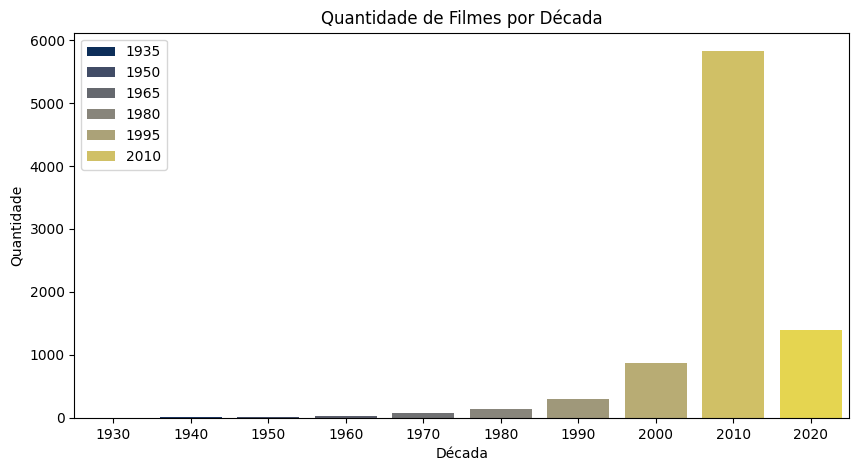

In [127]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_filmes_series.sort_values(colunaDecada), x=colunaDecada, palette='cividis', hue=colunaDecada)
plt.title('Quantidade de Filmes por Década')
plt.legend(title='')
plt.xlabel('Década')
plt.ylabel('Quantidade')
plt.show()

No mesmo contexto avaliando a mesma evolução em cada plataforma.

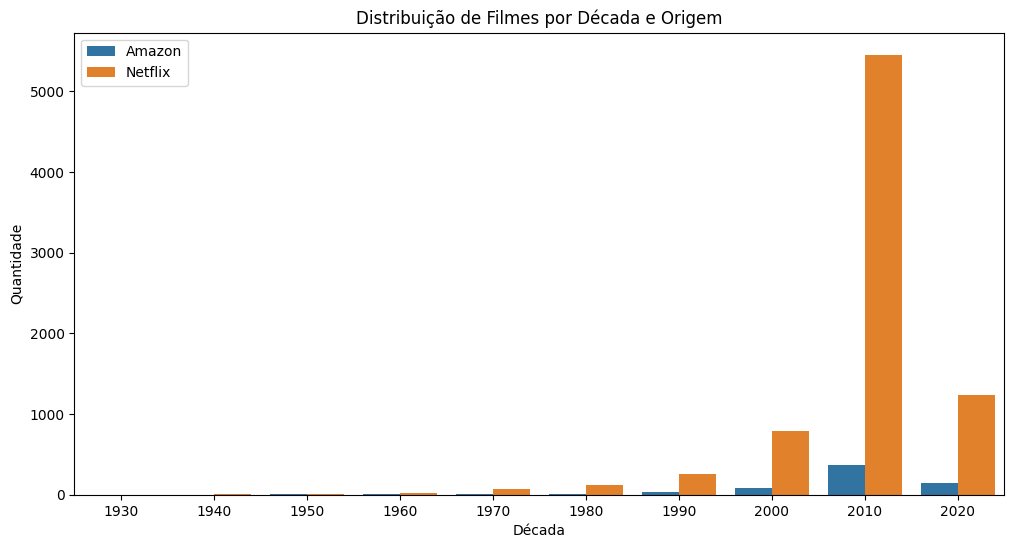

In [128]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filmes_series.sort_values('decada'), x=colunaDecada, hue=colunaOrigem, palette='tab10')
plt.title('Distribuição de Filmes por Década e Origem')
plt.xlabel('Década')
plt.ylabel('Quantidade')
plt.legend(title='')
plt.show()

Conforme informamos no início deste MVP os catálogo possuem registros até 2021
A ´decada 2020 não pode ser considerada

Podemos avaliar que a quantidade de títulos produzidos até a década de 70 é extremamente baixo.
O catálogo começa ganhar mais volumes com títulos da década de 80 até fim dos anos 90.
A maior concentração é dos títulos produzidos neste século, a partir de 2000, com ápice da década de 2010.


##Criando coluna genero_grupo

Criando e preenchendo informações na nova coluna 'genero_grupo' com base nos grupos propostos na análise dos dados ao criar a variável 'genero_mapping'

In [129]:
# atualizando dataframe com grupo de gêneros
valorGrupoOutros = 'Outros'
df_filmes_series[colunaGeneroGrupo] = df_filmes_series[colunaGenero].apply(lambda x: genero_mapping.get(x.strip(), valorGrupoOutros))

Gráfico comparando a proporção de cada gênero nos grupos criados em cada empresa (colunaorigem).

In [130]:
df_filmes_series.head()

,origem_dataframe,titulo,tipo,paises_origem,ano_lancamento,genero,decada,genero_grupo
0,Amazon,The Grand Seduction,Movie,Canada,2014,"Comedy, Drama",2010,Outros
1,Amazon,Take Care Good Night,Movie,India,2018,"Drama, International",2010,Outros
2,Amazon,Secrets of Deception,Movie,United States,2017,"Action, Drama, Suspense",2010,Outros
3,Amazon,Pink: Staying True,Movie,United States,2014,Documentary,2010,Documentário
4,Amazon,Monster Maker,Movie,United Kingdom,1989,"Drama, Fantasy",1980,Outros


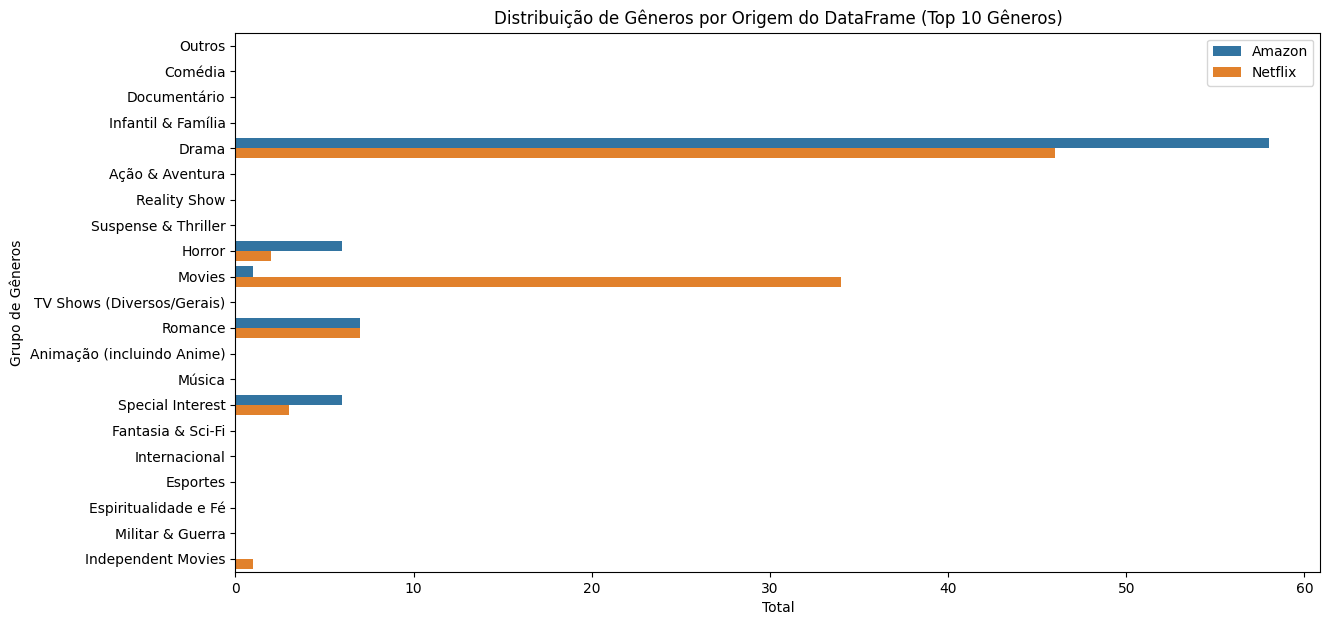

In [131]:
plt.figure(figsize=(14, 7))

sns.countplot(data=df_filmes_series, y=colunaGenero, hue=colunaOrigem,
              order=df_filmes_series[colunaGeneroGrupo].value_counts().index, palette='tab10')
plt.title('Distribuição de Gêneros por Origem do DataFrame (Top 10 Gêneros)')
plt.xlabel('Total')
plt.ylabel(descricaoGrupoGeneros)
plt.legend(title='')
plt.show()

##Coluna quantidade de títulos

In [132]:
df_filmes_series[colunaQtdTitulo] = df_filmes_series.groupby([colunaGeneroGrupo, colunaDecada, colunaOrigem])[colunaTitulo].transform('nunique')

##Estatística descritiva

Estatística de todo o dataframe

In [133]:
df_filmes_series.describe()

,ano_lancamento,decada,quantidade_titulos
count,8648.000000,8648.000000,8648.000000
mean,2013.808626,2008.674838,2248.237512
std,9.203080,9.548702,1918.284955
min,1939.000000,1930.000000,1.000000
25%,2013.000000,2010.000000,273.000000
50%,2017.000000,2010.000000,941.000000
75%,2019.000000,2010.000000,4204.000000
max,2024.000000,2020.000000,4204.000000


Estatística do dataframe Amazon Prime

In [134]:
print(f'Analise para origem {descricaoAmazon}')
df_filmes_series[df_filmes_series[colunaOrigem] == descricaoAmazon][colunaQtdTitulo].describe()

Analise para origem Amazon


,quantidade_titulos
count,672.000000
mean,131.663690
std,119.573061
min,1.000000
25%,18.000000
50%,88.000000
75%,273.000000
max,273.000000


Estatística do dataframe Netflix

In [135]:
print(f'Analise para origem {descricaoNetflix}')
df_filmes_series[df_filmes_series[colunaOrigem] == descricaoNetflix][colunaQtdTitulo].describe()

Analise para origem Netflix


,quantidade_titulos
count,7976.000000
mean,2426.564694
std,1891.928451
min,1.000000
25%,340.000000
50%,4204.000000
75%,4204.000000
max,4204.000000


In [136]:
print(f'Analise para origem {descricaoAmazon}')
df_filmes_series[df_filmes_series[colunaOrigem] == descricaoAmazon][colunaQtdTitulo].describe()

Analise para origem Amazon


,quantidade_titulos
count,672.000000
mean,131.663690
std,119.573061
min,1.000000
25%,18.000000
50%,88.000000
75%,273.000000
max,273.000000


In [137]:
# média dos atributos numéricos do dataset
df_filmes_series.describe().loc['mean']

,mean
ano_lancamento,2013.808626
decada,2008.674838
quantidade_titulos,2248.237512


In [138]:
df_filmes_series.head()

,origem_dataframe,titulo,tipo,paises_origem,ano_lancamento,genero,decada,genero_grupo,quantidade_titulos
0,Amazon,The Grand Seduction,Movie,Canada,2014,"Comedy, Drama",2010,Outros,273
1,Amazon,Take Care Good Night,Movie,India,2018,"Drama, International",2010,Outros,273
2,Amazon,Secrets of Deception,Movie,United States,2017,"Action, Drama, Suspense",2010,Outros,273
3,Amazon,Pink: Staying True,Movie,United States,2014,Documentary,2010,Documentário,18
4,Amazon,Monster Maker,Movie,United Kingdom,1989,"Drama, Fantasy",1980,Outros,10


Sabendo que o dataframe é um agrupamento por ano de lançamento e temos valorees bem distante da média para cada origem, vou fazer esse levantamento com a qunatidade de registros por décadas, por haver a posibilidade de descartar incorretamente alguns registros.

## Features e Variável Alvo

Definindo X e Y

In [139]:
df_filmes_series.head()

,origem_dataframe,titulo,tipo,paises_origem,ano_lancamento,genero,decada,genero_grupo,quantidade_titulos
0,Amazon,The Grand Seduction,Movie,Canada,2014,"Comedy, Drama",2010,Outros,273
1,Amazon,Take Care Good Night,Movie,India,2018,"Drama, International",2010,Outros,273
2,Amazon,Secrets of Deception,Movie,United States,2017,"Action, Drama, Suspense",2010,Outros,273
3,Amazon,Pink: Staying True,Movie,United States,2014,Documentary,2010,Documentário,18
4,Amazon,Monster Maker,Movie,United Kingdom,1989,"Drama, Fantasy",1980,Outros,10


In [140]:
X = df_filmes_series[[colunaGeneroGrupo, colunaDecada, colunaPais, colunaQtdTitulo]]
y = df_filmes_series[colunaOrigem]

## Divisão dos dados (split)

In [141]:
# Dividindo os dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [142]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (6918, 4)
Dimensões de X_test: (1730, 4)
Dimensões de y_train: (6918,)
Dimensões de y_test: (1730,)


In [143]:
print(f"\nProporção de 'origem_dataframe' no conjunto de treinamento:\n{y_train.value_counts(normalize=True)}")
print(f"\nProporção de 'origem_dataframe' no conjunto de teste:\n{y_test.value_counts(normalize=True)}")


Proporção de 'origem_dataframe' no conjunto de treinamento:
origem_dataframe
Netflix    0.922232
Amazon     0.077768
Name: proportion, dtype: float64

Proporção de 'origem_dataframe' no conjunto de teste:
origem_dataframe
Netflix    0.922543
Amazon     0.077457
Name: proportion, dtype: float64


#**Testando com Modelos**
---

##Modelo Random Forest

###Usando o pré-processador usando ColumnTransformer

In [144]:
# Colunas categóricas para One-Hot Encoding (genero_grupo)
categorical_features_ohe = [colunaGeneroGrupo]

In [145]:
# Colunas numéricas que serão usadas diretamente
numerical_features = [colunaDecada]

In [146]:
# A coluna 'paises_origem' será tratada pelo nosso transformador customizado
country_feature_name = colunaPais # Mantemos como lista para o ColumnTransformer

In [147]:
# Colunas numéricas para Padronização
numerical_features_scaling = [colunaDecada, colunaQtdTitulo] # Agora incluímos quantidade_titulos aqui

Configurando o Pipeline com o Transformador Customizado.

In [148]:
preprocessor = ColumnTransformer(
    transformers=[
        # Aplicar OneHotEncoder para 'genero_grupo'
        ('genero_ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features_ohe),
        # Aplicar StandardScaler para 'decada' e 'quantidade_titulos'
        ('numeric_scaler', StandardScaler(), numerical_features_scaling),
        # Aplicar nosso MultiHotEncoder customizado para 'paises_origem'
        ('paises_multi_hot', MultiHotEncoder(sep=','), [country_feature_name])
    ],
    remainder='drop' # Descarta qualquer outra coluna que não tenha sido especificada
)

Pipeline completo

In [149]:
# Agora, o Pipeline completo
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

print("\n--- Treinando o Modelo Random Forest (com Padronização e Multi-Hot Encoding) ---")
model_rf.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso!")


--- Treinando o Modelo Random Forest (com Padronização e Multi-Hot Encoding) ---
Modelo Random Forest treinado com sucesso!


Avaliação do Modelo Random Forest


--- Relatório de Classificação (Random Forest) ---
              precision    recall  f1-score   support

      Amazon       0.98      0.95      0.97       134
     Netflix       1.00      1.00      1.00      1596

    accuracy                           0.99      1730
   macro avg       0.99      0.97      0.98      1730
weighted avg       0.99      0.99      0.99      1730


--- Matriz de Confusão (Random Forest) ---
[[ 127    7]
 [   2 1594]]


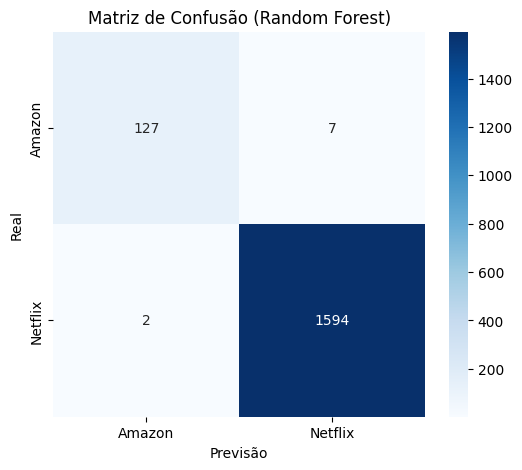

In [150]:
y_pred_rf = model_rf.predict(X_test)

print("\n--- Relatório de Classificação (Random Forest) ---")
print(classification_report(y_test, y_pred_rf))

print("\n--- Matriz de Confusão (Random Forest) ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Matriz de Confusão (Random Forest)')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

Acurácia do modelo

In [151]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Modelo Random Forest: {accuracy_rf:.2f}")

Acurácia do Modelo Random Forest: 0.99


###Predição com os Dados

In [152]:
dados_novo_filme = pd.DataFrame([{
    colunaGeneroGrupo: 'Drama',
    colunaDecada: 2010,
    colunaPais: 'Estados Unidos,França',
    colunaQtdTitulo: 5
}])

In [153]:
predicted_origin_rf = model_rf.predict(dados_novo_filme)
predicted_proba_rf = model_rf.predict_proba(dados_novo_filme)

In [154]:
print("Filme avaliado")
separadorLinha()
print('Um filme com os dados:')
print(f'Gênero: {dados_novo_filme[colunaGeneroGrupo].iloc[0]}')
print(f'Década: {dados_novo_filme[colunaDecada].iloc[0]}')
print(f'País(es) de origem: {dados_novo_filme[colunaPais].iloc[0]}')
print(f'e {dados_novo_filme[colunaQtdTitulo].iloc[0]} títulos')

print(f"Origem prevista: {predicted_origin_rf[0]}")

print(f"Probabilidade: {model_rf.classes_[0]}: {predicted_proba_rf[0][0]:.2f}, {model_rf.classes_[1]}: {predicted_proba_rf[0][1]:.2f}")


Filme avaliado
------------------------------------------------------------------------------------------------------------------------------------------------------
Um filme com os dados:
Gênero: Drama
Década: 2010
País(es) de origem: Estados Unidos,França
e 5 títulos
Origem prevista: Amazon
Probabilidade: Amazon: 0.57, Netflix: 0.43


##Regressão Logística
---

In [155]:
print(f"\nProporção de 'origem_dataframe' no conjunto de treinamento:\n{y_train.value_counts(normalize=True)}")
print(f"\nProporção de 'origem_dataframe' no conjunto de teste:\n{y_test.value_counts(normalize=True)}")


Proporção de 'origem_dataframe' no conjunto de treinamento:
origem_dataframe
Netflix    0.922232
Amazon     0.077768
Name: proportion, dtype: float64

Proporção de 'origem_dataframe' no conjunto de teste:
origem_dataframe
Netflix    0.922543
Amazon     0.077457
Name: proportion, dtype: float64


In [156]:
# Colunas categóricas para One-Hot Encoding
categorical_features_ohe = ['genero_grupo']

# Colunas numéricas para Padronização
numerical_features_scaling = ['decada', 'quantidade_titulos']

# A coluna 'paises_origem' será tratada pelo nosso transformador customizado
country_feature_name = 'paises_origem'


In [157]:
preprocessor = ColumnTransformer(
    transformers=[
        ('genero_ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features_ohe),
        ('numeric_scaler', StandardScaler(), numerical_features_scaling),
        ('paises_multi_hot', MultiHotEncoder(sep=','), [country_feature_name])
    ],
    remainder='drop'
)

# --- MUDA AQUI: Substituímos RandomForestClassifier por LogisticRegression ---
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42, solver='liblinear'))]) # Usando 'liblinear' para datasets menores e para penalidades L1/L2

print("\n--- Treinando o Modelo de Regressão Logística (com Padronização e Multi-Hot Encoding) ---")
model_lr.fit(X_train, y_train)

print("Modelo de Regressão Logística treinado com sucesso!")


--- Treinando o Modelo de Regressão Logística (com Padronização e Multi-Hot Encoding) ---
Modelo de Regressão Logística treinado com sucesso!


In [158]:
 #--- 6. Avaliação do Modelo de Regressão Logística ---
y_pred_lr = model_lr.predict(X_test)

print("\n--- Relatório de Classificação (Regressão Logística) ---")
print(classification_report(y_test, y_pred_lr))

print("\n--- Matriz de Confusão (Regressão Logística) ---")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)


--- Relatório de Classificação (Regressão Logística) ---
              precision    recall  f1-score   support

      Amazon       0.94      0.49      0.64       134
     Netflix       0.96      1.00      0.98      1596

    accuracy                           0.96      1730
   macro avg       0.95      0.74      0.81      1730
weighted avg       0.96      0.96      0.95      1730


--- Matriz de Confusão (Regressão Logística) ---
[[  65   69]
 [   4 1592]]


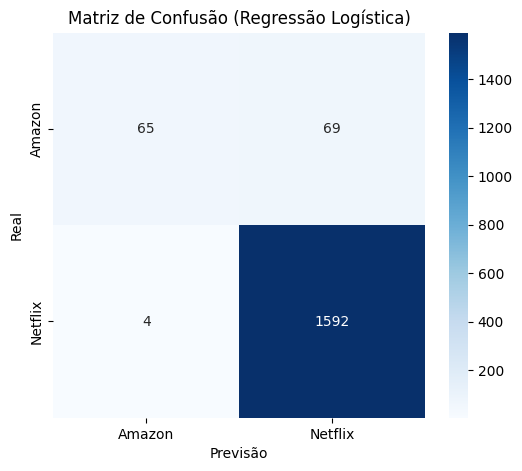

In [159]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.title('Matriz de Confusão (Regressão Logística)')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

In [160]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAcurácia do Modelo de Regressão Logística: {accuracy_lr:.2f}")


Acurácia do Modelo de Regressão Logística: 0.96


##Predição com um novo 'filme'

In [162]:
new_movie_data = pd.DataFrame([{
    'genero_grupo': 'Dramas',
    'decada': 2010,
    'paises_origem': 'South Korea',
    'quantidade_titulos': 5
}])

predicted_origin_lr = model_lr.predict(new_movie_data)
predicted_proba_lr = model_lr.predict_proba(new_movie_data)

print(f"Para um filme de '{new_movie_data['genero_grupo'].iloc[0]}' da década de {new_movie_data['decada'].iloc[0]} com origem em '{new_movie_data['paises_origem'].iloc[0]}' e {new_movie_data['quantidade_titulos'].iloc[0]} títulos:")
print(f"Origem prevista: {predicted_origin_lr[0]}")
print(f"Probabilidade: {model_lr.classes_[0]}: {predicted_proba_lr[0][0]:.2f}, {model_lr.classes_[1]}: {predicted_proba_lr[0][1]:.2f}")

Para um filme de 'Dramas' da década de 2010 com origem em 'South Korea' e 5 títulos:
Origem prevista: Netflix
Probabilidade: Amazon: 0.42, Netflix: 0.58


In [163]:
# --- 8. Interpretabilidade: Coeficientes da Regressão Logística ---
print("\n--- Interpretabilidade do Modelo de Regressão Logística (Coeficientes) ---")

# Para acessar os coeficientes, precisamos descompactar o pipeline e o ColumnTransformer
# Primeiro, obter as features processadas para ter os nomes das colunas
# Fazendo um fit_transform no X_train original com o preprocessor para obter os nomes das colunas
X_train_transformed = model_lr.named_steps['preprocessor'].transform(X_train)

# Obter os nomes das colunas após o pré-processamento
feature_names = model_lr.named_steps['preprocessor'].get_feature_names_out()

# Criar um DataFrame com os coeficientes e os nomes das features
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_lr.named_steps['classifier'].coef_[0] # Coeficientes para a primeira classe (ou binária)
})

# Ordenar por valor absoluto do coeficiente para ver as features mais influentes
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df.head(10)) # Mostra as 10 features mais influentes
print(f"\nIntercepto (bias): {model_lr.named_steps['classifier'].intercept_[0]:.4f}")


--- Interpretabilidade do Modelo de Regressão Logística (Coeficientes) ---
                                         Feature  Coefficient  Abs_Coefficient
21            numeric_scaler__quantidade_titulos    10.082424        10.082424
15         genero_ohe__genero_grupo_Reality Show     2.446912         2.446912
9    genero_ohe__genero_grupo_Infantil & Família     2.390247         2.390247
1       genero_ohe__genero_grupo_Ação & Aventura     2.028097         2.028097
12               genero_ohe__genero_grupo_Movies     1.970848         1.970848
63         paises_multi_hot__paises_origem_India    -1.660473         1.660473
7                genero_ohe__genero_grupo_Horror     1.515968         1.515968
14               genero_ohe__genero_grupo_Outros    -1.421266         1.421266
3          genero_ohe__genero_grupo_Documentário     1.397315         1.397315
18  genero_ohe__genero_grupo_Suspense & Thriller     1.353134         1.353134

Intercepto (bias): 13.1881


Esta é a grande vantagem da Regressão Logística.
Após treinar o modelo, você pode acessar os coeficientes (model_lr.named_steps['classifier'].coef_[0]).

Cada coeficiente indica a força e a direção da relação entre a feature e a probabilidade de um filme pertencer à classe positiva (geralmente a classe 1, que seria "Netflix" se "Amazon" for a 0, ou vice-versa).

Interpretação dos Coeficientes:

Um coeficiente positivo e alto para uma feature (ex: genero_ohe__genero_grupo_SciFiFantasy) significa que, quando essa feature está presente (ou tem um valor alto, se for numérica), a probabilidade de ser da classe "Netflix" aumenta.

Um coeficiente negativo e alto significa que, quando essa feature está presente, a probabilidade de ser da classe "Netflix" diminui (ou seja, aumenta a probabilidade de ser da "Amazon").

O valor absoluto do coeficiente indica a força da influência.

O Intercepto (bias) é o log-odds da classe positiva quando todas as features são zero.

Ao analisar os coeficientes, você poderá responder a perguntas como:

"Quais países estão mais fortemente associados à Netflix (ou Amazon)?"

"Um número maior de títulos em uma categoria específica torna mais provável que seja de uma plataforma X ou Y?"

"Há uma década que é um forte preditor da origem?"

A Regressão Logística, com sua interpretabilidade, pode te dar insights valiosos sobre as relações nos seus dados, complementando a capacidade preditiva do Random Forest.

Você gostaria de aprofundar na interpretação dos coeficientes uma vez que rodar esse código com seus dados?

#Considerações finais